checking to see if a 2D histogram helps with visualizing the effects of different features

In [3]:
#libraries and functions
import patientFunctions as ptFn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches

# directory

In [4]:
#directory management
#updates to directory management
# machine_directory = 'C:/Users/mcremer' #the C and path to the project folder
machine_directory = 'C:/Users/maega' #when working from home machine
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '014_Mistic2' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

parent_dir = path

folderNameHeader = "FeatHisto"
folderNameCommon = '_Mistic2_linear'
folderNameSuffix = "_250117_v1"

fileNameHeader = "FeatHisto"
fileNameCommon = '_Mistic2_linear'
fileNameSuffix = "_250117_v1"

folder_data_out = ptFn.makeFolderPathForData(parent_dir=parent_dir, folderName_header=folderNameHeader,
                                        folderName_common=folderNameCommon, folderName_suffix=folderNameSuffix)


In [5]:
mpl.rcParams['figure.dpi'] = 300

# data used in SVM

In [6]:
#import data from DF for SVM
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '014_Mistic2/020_construction of data frames' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory, "DFsForSVM_CompLabswoEcho_exG01J01_MDfits_20241022_v1")

parent_dir = path
os.chdir(parent_dir)

#importing features used in SVM
model_features = pd.read_excel("AL-KnownPts_CompLabs_descFits_241022.xlsx", sheet_name = "ALL", header = [0])
# features_across_models= model_features



storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '014_Mistic2' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

parent_dir = path

In [7]:
#reindex the dataframe
new_index = [x for x in model_features["DeID"]]

model_features.index = new_index

# features selected across models

In [8]:
#import data from DF for SVM
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '014_Mistic2' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

parent_dir = path
os.chdir(parent_dir)

#importing features used in SVM
features_across_models = pd.read_excel("ComparingRBFvLinear_20241118_v1.xlsx", sheet_name = "linearforpaper", header = [0])
#columns 1,2,3,4 are the columns with list of features.  The header row tells you the the features came from


# raw data


In [9]:
project_lv2_directory = '012 Processed Data/data-2024-06-05' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

new_dirrectory = path
os.chdir(new_dirrectory)

In [10]:
#build a dictionary of patients and their values 
ptFiles = ptFn.GetListofPTfiles(new_dirrectory, '.xlsx', 'data')

patientDictAmyloid = {}
patientDictSurvival = {}
patientDictLabs = {}
patientDictEcho = {}
patientDictNotes = {}
patientDictDx = {}
patientDictVitalStatus = {}
patientDictSex = {}
patientDictAge = {}
patientDictChemo = {}
patientDictImmuno = {}
patientDictHeme = {}
patientDictRad = {}
patientDictOther = {}

#loop through the listOfPatients 
for file in ptFiles: 
    pt = ptFn.patient(new_dirrectory, file, 4)
    patientDictAmyloid[pt.ptID] = pt.amyloid_status
    patientDictSurvival[pt.ptID] = pt.survival
    patientDictLabs[pt.ptID] = pt.labsData
    patientDictEcho[pt.ptID] = pt.echoData
    patientDictNotes[pt.ptID] = pt.MDnotes
    patientDictDx[pt.ptID] = pt.dx
    patientDictVitalStatus[pt.ptID] = pt.vitalStatus
    patientDictSex[pt.ptID] = pt.sex
    patientDictAge[pt.ptID] = pt.ageDx
    patientDictChemo[pt.ptID] = pt.ChemoTx
    patientDictImmuno[pt.ptID] = pt.ImmunoTx
    patientDictHeme[pt.ptID] = pt.HemeTx
    patientDictRad[pt.ptID] = pt.RadTx
    patientDictOther[pt.ptID] = pt.OtherTx

In [11]:
#sort the patient list by amyloid status

listPositive = []
listNegative = []
listOther = []

ptFn.getListSortedByAmyloid(patientDictAmyloid, listPositive= listPositive,
                       listNegative=listNegative, listOther=listOther)

list_pts_remove = ["K-01", "G-01", "J-01", "L-02"]
for pt in list_pts_remove:
    if pt in listPositive:
        listPositive.remove(pt)
    if pt in listNegative:
        listNegative.remove(pt)
    if pt in listOther:
        listOther.remove(pt)

#first make a copy of the list
listALKnown = listPositive.copy()
#add the negative patients to the list of positive patients
listALKnown.extend(listNegative) 


# Segment data

In [12]:
list_allpossible_features = [x for x in model_features.columns]
list_allpossible_features = list_allpossible_features[6:]

In [13]:
model_features_positive = model_features.loc[listPositive]
model_features_negative = model_features.loc[listNegative]

In [14]:
#features import from the models
models_list = ["descFits05", "descOnly075", "paramsOnly"]
features_selected = features_across_models["descFits05"]

# Plot histograms

In [15]:
#plot features
alpha = 0.5
color_positive = "red"
color_negative = "blue"

In [16]:
#dimensions for the multiple plots in one figure 
rows_for_fig = 8
cols_for_fig = 8
number_of_figs_in_plot = rows_for_fig*cols_for_fig
positions = [(i // cols_for_fig, i % cols_for_fig) for i in range(rows_for_fig * cols_for_fig)]

columnsForFigure = list_allpossible_features
#slice the list of columns in groups 

slices_sorted = [columnsForFigure[i:i + number_of_figs_in_plot] for i in range(0, len(columnsForFigure), number_of_figs_in_plot)] 

In [17]:
# #Plots histograms
# i = 0
# for feature in features_selected: 
#     fig, ax = plt.subplots()
#     ax.hist(model_features_positive[feature], color = color_positive, alpha = alpha)
#     ax.hist(model_features_negative[feature], color = color_negative, alpha = alpha)
#     amyloidpositive_patch = mpatches.Patch(color = color_positive, alpha = alpha, label = "Amyloid Positive")
#     amyloidnegative_patch = mpatches.Patch(color = color_negative, alpha = alpha, label = "Amyloid Negative")
#     ax.legend(handles = [amyloidpositive_patch, amyloidnegative_patch])
#     fig.suptitle(feature + " by Amyloid status")

#     figCommon = fileNameCommon + "_histo_" + str(i) +"_"
#     fig_file_out = ptFn.outputFiguresPath(fileName_header=fileNameHeader, fileName_mid=figCommon, 
#                                  fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
#     fig.savefig(fig_file_out, bbox_inches = 'tight')
#     i = i+1

## 2D histograms

In [18]:
#import features from feature compliation list
# #features import from the models
# models_list = ["desc stats + fits", "desc stats", "params only"]
# features_selected = features_across_models.loc["desc stats + fits"]

In [19]:

featuresToPlot = list(features_selected)
featuresToPlot = featuresToPlot.append(["Amyloid Status_yes"])

In [20]:
os.getcwd()

'C:\\Users\\maega\\UFL Dropbox\\Maegan Cremer\\research-share\\Maegan\\Projects\\Cardiac-Amyloidosis-Multiple-Myeloma\\012 Processed Data\\data-2024-06-05'

In [21]:
sns.set(font_scale = 0.5)
palette = {1 :'red', 0: 'blue'} #our data is of int64

i = 1 
for model in models_list:
    featuresToPlot = list(features_across_models[model].dropna())
    featuresToPlot.append("Amyloid Status_yes")
    # print(featuresToPlot)
    fig = sns.pairplot(model_features[featuresToPlot],hue= "Amyloid Status_yes", palette=palette, corner=True, height = 1.5)
    # fig.map_lower(sns.kdeplot, levels = 4)
    fig.fig.suptitle("Pair Plot " + str(model))

    figCommon = "pairplot_" + str(i)
    fig_file_out = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                                    fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
    fig.savefig(fig_file_out, bbox_inches = 'tight')
    fig_file_out_jpg = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                                fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out, fileExtension= '.jpg')
    fig.savefig(fig_file_out_jpg, bbox_inches = 'tight')
    i = i+1 

KeyboardInterrupt: 

In [20]:
# #Plots histograms
# i = 0
# for feature in features_selected: 
#     fig, ax = plt.subplots()
#     ax.hist(model_features_positive[feature], color = color_positive, alpha = alpha)
#     ax.hist(model_features_negative[feature], color = color_negative, alpha = alpha)
#     amyloidpositive_patch = mpatches.Patch(color = color_positive, alpha = alpha, label = "Amyloid Positive")
#     amyloidnegative_patch = mpatches.Patch(color = color_negative, alpha = alpha, label = "Amyloid Negative")
#     ax.legend(handles = [amyloidpositive_patch, amyloidnegative_patch])
#     fig.suptitle(feature + " by Amyloid status")

#     figCommon = fileNameCommon + "_histo_" + str(i) +"_"
#     fig_file_out = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid=figCommon, 
#                                  fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
#     fig.savefig(fig_file_out, bbox_inches = 'tight')
#     i = i+1

In [21]:
# fig, ax = plt.subplots()
# ax.hist2d(model_features_positive[feature_1], model_features_positive[feature_2], bins = (50,50), cmap = plt.cm.Blues)

In [22]:
# sns.set(font_scale = 0.5)
# palette = {1 :'red', 0: 'blue'} #our data is of int64

# featuresToPlot = ["MCV Result Exp coef", "Chloride Result(mmol/L) Desc 25%", "BUN Result(mg/dL) Desc min",
#                    "Creatinine Result(mg/dL) Desc 25%", "Pct. Immature Gran Auto Result Desc max",  "Pct. Immature Gran Auto Result Desc std",
#                    "Serum Electrophoresis Alpha 1 Result Desc mean", "Albumin Electrophoresis Result Desc max", "RBC Result Exp residual error",
#                     "Calcium Result(mg/dL) Exp residual error", "Sodium Result(mmol/L) Exp residual error", "Pct. Immature Gran Auto Result Desc min",
#                      "Nucleated RBC Result Desc 75%", "Serum Electrophoresis Alpha 1 Result Desc min", "Serum Electrophoresis Alpha 1 Result Desc 25%" ]
# featuresToPlot.append("Amyloid Status_yes")
# # print(featuresToPlot)
# fig = sns.pairplot(model_features[featuresToPlot],hue= "Amyloid Status_yes", palette=palette, corner=True, height = 1.5, plot_kws={'alpha':0.5})
# # fig.map_lower(sns.kdeplot, levels = 4)
# fig.fig.suptitle("Pair Plot " + str(model))

# figCommon = "pairplot_corr_" 
# fig_file_out = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
#                                 fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
# fig.savefig(fig_file_out, bbox_inches = 'tight')


# statistics for data used in classifer

code borrowed from AmyloidVsEchoValues

In [23]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy import stats

In [24]:
features_selected #features from the descFits model linear

0             Beta-2-Microglobulin Result Desc min
1                 Chloride Result(mmol/L) Desc 25%
2                Creatinine Result(mg/dL) Desc 25%
3                        total CO2 Result Desc 50%
4                            Troponin-T Desc count
5          Beta-2-Microglobulin Result Linear coef
6     Beta-2-Microglobulin Result Linear intercept
7           Sodium Result(mmol/L) Linear intercept
8      Total Serum Protein Result Linear intercept
9        Beta-2-Microglobulin Result Exp intercpet
10          Creatinine Result(mg/dL) Exp intercpet
11            Ferritin Result(ng/mL) Exp intercpet
12                       Pct. Mono Result Exp coef
13        Total Serum Protein Result Exp intercpet
14                ECOG Performance Status Desc min
15                ECOG Performance Status Desc max
16                                             NaN
17                                             NaN
18                                             NaN
19                             

In [25]:
list_allpossible_features

['Dx_other',
 'Sex_female',
 'Sex_male',
 'Age',
 'Survival (in months)',
 'ALT Result(U/L) Desc count',
 'ALT Result(U/L) Desc mean',
 'ALT Result(U/L) Desc std',
 'ALT Result(U/L) Desc min',
 'ALT Result(U/L) Desc 25%',
 'ALT Result(U/L) Desc 50%',
 'ALT Result(U/L) Desc 75%',
 'ALT Result(U/L) Desc max',
 'AST Result(U/L) Desc count',
 'AST Result(U/L) Desc mean',
 'AST Result(U/L) Desc std',
 'AST Result(U/L) Desc min',
 'AST Result(U/L) Desc 25%',
 'AST Result(U/L) Desc 50%',
 'AST Result(U/L) Desc 75%',
 'AST Result(U/L) Desc max',
 'Albumin Electrophoresis Result Desc count',
 'Albumin Electrophoresis Result Desc mean',
 'Albumin Electrophoresis Result Desc std',
 'Albumin Electrophoresis Result Desc min',
 'Albumin Electrophoresis Result Desc 25%',
 'Albumin Electrophoresis Result Desc 50%',
 'Albumin Electrophoresis Result Desc 75%',
 'Albumin Electrophoresis Result Desc max',
 'Albumin Result(gm/dL) Desc count',
 'Albumin Result(gm/dL) Desc mean',
 'Albumin Result(gm/dL) Desc

In [26]:
import scipy.stats as st

In [27]:
#for t test for comparing features grouped by amyloid positive and negative 
#final comparisons will be done using graphpad

ALPostiveData = model_features.loc[listPositive]
ALNegativeData = model_features.loc[listNegative]

dict_imagingValue_stats = {} #here, this is actually feature values
dict_imagingValue_variance_stats = {} #again, also feature values
for imagingValue in list_allpossible_features:
    #filtering the data to remove the penalty values and missing values
    
    dataPostive = ALPostiveData[imagingValue].dropna(axis = 'index')
    dataNegative = ALNegativeData[imagingValue].dropna(axis = 'index')

    #check for variance
    levene_test = stats.levene(dataPostive, dataNegative, nan_policy="omit")
    #the brown-forsythe might be more appropriate depending on scewness hense moving to graphpad for final analysis
    dict_imagingValue_variance_stats[imagingValue] = [levene_test.statistic, levene_test.pvalue]

    dict_imagingValue_stats[imagingValue] = ttest_ind(dataPostive, dataNegative, equal_var=False)
    #using equal_var False results in Welch's nonparametric t tests
    #equality of variance should be checked using Barlett's or Levene's tests and the histograms


df_imagingValue_stats = pd.DataFrame.from_dict(dict_imagingValue_stats, orient = "index")
df_imagingValue_variance_stats = pd.DataFrame.from_dict(dict_imagingValue_variance_stats, orient = "index")
df_imagingValue_variance_stats.columns = ["levene_statistic", "levene_pvalue"]

df_imagingValue_stats_2 = pd.concat([df_imagingValue_stats,df_imagingValue_variance_stats], axis=1)

#sort the data by pvalue
df_imagingValue_stats_2 = df_imagingValue_stats_2.sort_values(by='pvalue', ascending=True)

ptFn.outputToExcel(df_data = df_imagingValue_stats_2, fileName_header= fileNameHeader, fileName_Common= fileNameCommon + "stats_", fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName= "Welch-T-test Features")

c:\Users\maega\anaconda3\envs\BEAT-Labs_2024-08-02\lib\site-packages\scipy\stats\_morestats.py:3345: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


In [ ]:
#features import from the models
models_list = ["descFits05", "descOnly075", "paramsOnly"]
features_selected = features_across_models["descFits05"]

In [33]:
featureslice

0             Beta-2-Microglobulin Result Desc min
1                 Chloride Result(mmol/L) Desc 25%
2                Creatinine Result(mg/dL) Desc 25%
3                        total CO2 Result Desc 50%
4                            Troponin-T Desc count
5          Beta-2-Microglobulin Result Linear coef
6     Beta-2-Microglobulin Result Linear intercept
7           Sodium Result(mmol/L) Linear intercept
8      Total Serum Protein Result Linear intercept
9        Beta-2-Microglobulin Result Exp intercpet
10          Creatinine Result(mg/dL) Exp intercpet
11            Ferritin Result(ng/mL) Exp intercpet
12                       Pct. Mono Result Exp coef
13        Total Serum Protein Result Exp intercpet
14                ECOG Performance Status Desc min
15                ECOG Performance Status Desc max
Name: descFits05, dtype: object

In [34]:
#pulling those feature which fit the model of interest
for model in models_list: 
    featureslice = features_across_models[model].copy().dropna()
    df_featureTstats_bymodel = df_imagingValue_stats_2.loc[featureslice]
    ptFn.outputToExcel(df_data = df_featureTstats_bymodel, fileName_header= fileNameHeader, fileName_Common= fileNameCommon + "stats_", fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName= "T-test Features " +str(model))

In [ ]:
#plotting those with P<0.05 as estimation plots or Gardner-Altman plots


In [42]:
#checking for correlation among those with p<0.05

#pull the features
features_significant = df_imagingValue_stats[df_imagingValue_stats['pvalue']<0.05].index #gets list of names of features that have p <0.05
featurevalues_significant = model_features[features_significant] #gets the slice of the spreadsheet of feature values

#creating correlation matrix 
featurevalues_significant_corr = featurevalues_significant.corr()



In [49]:
#get the list of pairings that have significant correlations 
filtered_correlations = featurevalues_significant_corr[featurevalues_significant_corr > 0.5]
stacked_correlations = filtered_correlations.stack()
stacked_correlations = stacked_correlations.loc[stacked_correlations.index.get_level_values(0) != stacked_correlations.index.get_level_values(1)]

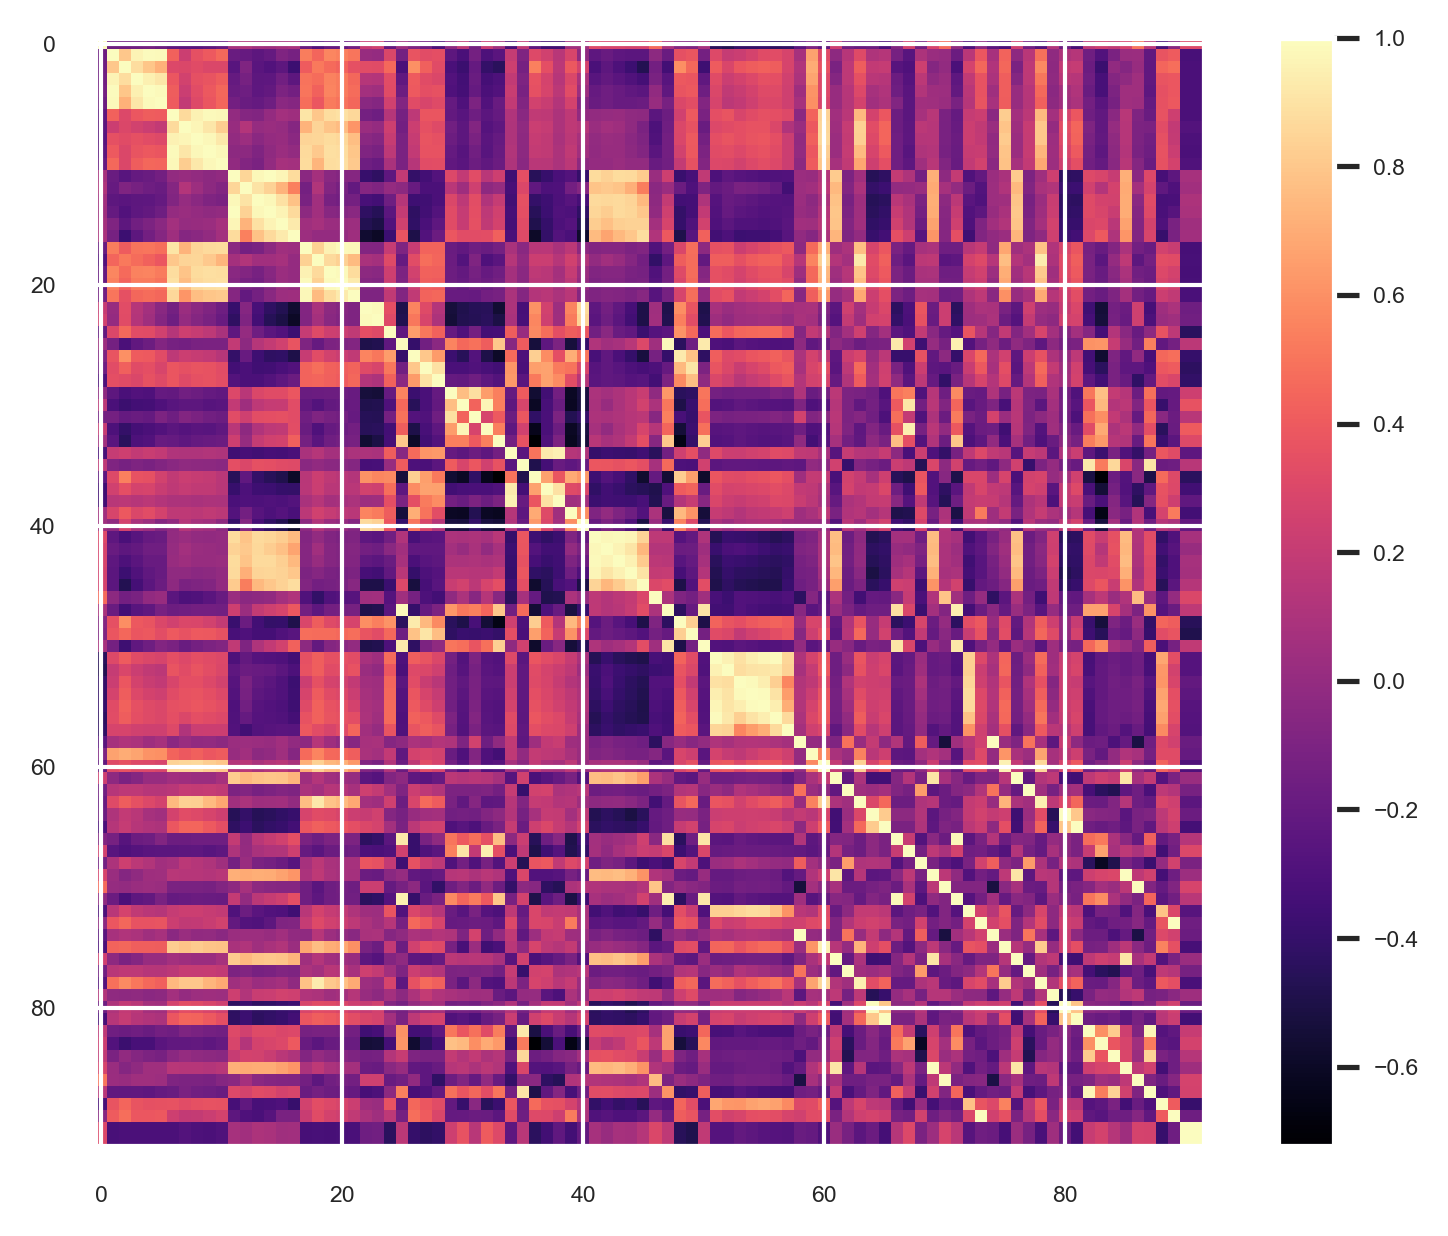

In [47]:
plt.imshow(featurevalues_significant_corr, cmap= 'magma')
plt.colorbar()

In [52]:
#check for correlation among selected features
dict_correlation ={}
for model in models_list:
    featuresvalues_selected = model_features[features_across_models[model].copy().dropna()] #gets the slice of the spreadsheet of feature values
    #creating correlation matrix 
    featurevalues_selected_corr = featuresvalues_selected.corr()
    dict_correlation[model] = featurevalues_selected_corr
    # plt.imshow(featurevalues_selected_corr, cmap= 'magma')
    # plt.colorbar()


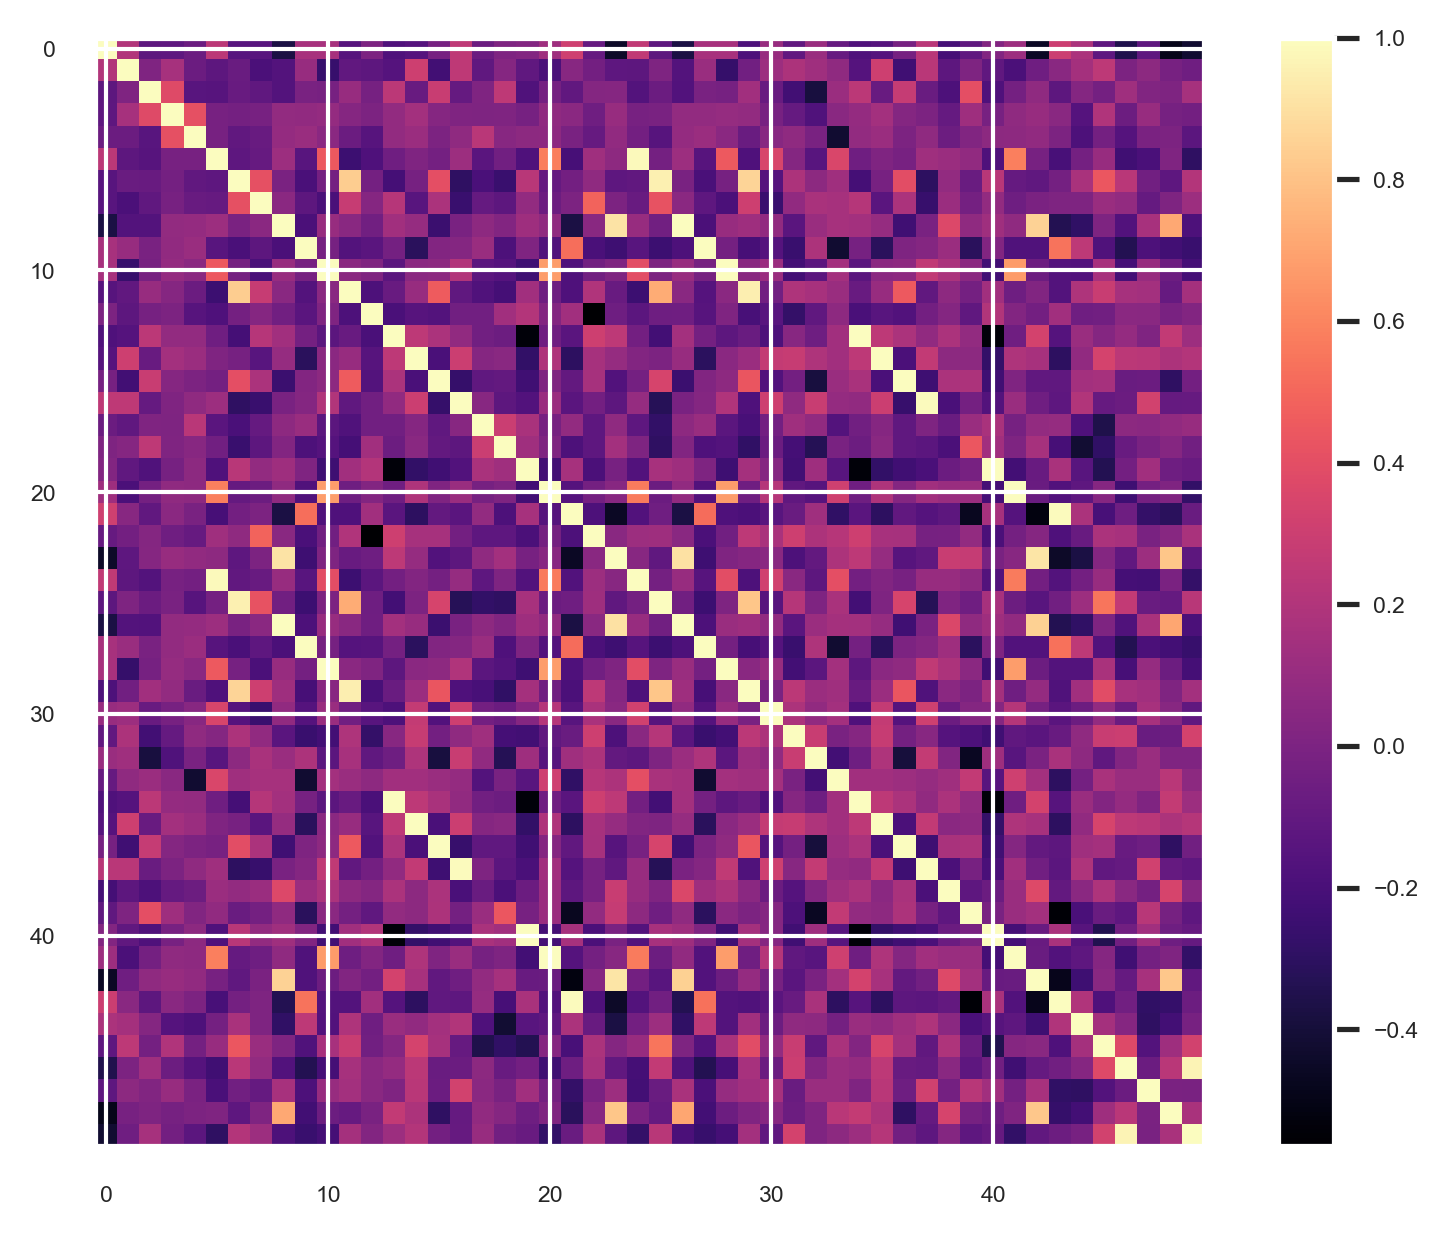

In [55]:
plt.imshow(dict_correlation['paramsOnly'], cmap= 'magma')
plt.colorbar()

In [40]:
len(features_significant)

92

# plots for a different set of data

collecting all raw values by amyloid status.  calculating T test difference between amyloid positive an negative without weighting by number of measures for a patient... patient identifiers removed.

# plotting raw labs by amyloid status

### collecting labs by amyloid status

In [29]:
columnsToUse = ["Ferritin Result(ng/mL)","Troponin-T","NT Pro BNP (B-Type Natriuretic Peptide)","Beta-2-Microglobulin Result",
                "ALT Result(U/L)","LDH Result(U/L)","Creatinine Result(mg/dL)","Potassium Result(mmol/L)","Glucose Result",
                "total CO2 Result","Sodium Result(mmol/L)","Calcium Result(mg/dL)","Chloride Result(mmol/L)","BUN Result(mg/dL)",
                "Platelet Count Result(k/uL)","Hemoglobin Result","MCV Result","MCHC Result","MCH Result(pg)","HCT Result",
                'RBC Result','WBC Result(k/uL)','Albumin Result(gm/dL)','Pct. Mono Result','Pct. Neutrophil Result',
                'Neutrophil Result','Monocyte Result','Nucleated RBC Result','Pct. Immature Gran Auto Result','AST Result(U/L)',
                'Total Serum Protein Result','Kappa Free Light Chains Result (mg/L)','Serum Electrophoresis Gamma Result','Albumin Electrophoresis Result',
                'Serum Electrophoresis Alpha 1 Result','Serum Electrophoresis Alpha 2 Result','Serum Electrophoresis Beta Result']

In [30]:
#dictionary for the filtered data and the list of columnNames
#this enables filtering of the patient data as its own block of code
dictOfFilteredLabs = {}

#other input values to set outside of loop 
x_column_name = "RelTime(Days)"
#creating dictionaries for all patients in the dirrectory 

#also collects the column names of interest 

for ptID in (patientDictLabs.keys()):
    #to collect and filter the patient labs into a dictionary
    df_Labs = patientDictLabs[ptID]

    orig_columns = df_Labs.columns

    #filter the patient labs

    columnNames = ptFn.FilterList(orig_columns, keyWords_primary = columnsToUse,
                             omit = ['Method', 'ABO', 'Dohle', "Toxic Granulation", "D Dimer Result",
                                        "Urine Color Result", "Urine Leukocyte Esterase Result",
                                        "Urine Nitrite Result", "Urinalysis Squamous Epithelial Cells Result (/hpf)",
                                        "(/hpf)", "Hep B", "Hep B Surf Ag Result", "Hep C", "Hep C Ab Screen Result",
                                        "Hypersegmentation Result", "HCG Result (Serum)", "Coombs Test Result",
                                        "HIV Result", "Urine Glucose Result(mg/dL)", "Pct. Atypical Lymphocyte Result",
                                        "Indirect Bilirubin Result", "Atypical Lymphocyte Result"])
    
    
    
    testNames = [x_column_name]
    testNames.extend(columnNames) #addition of time label


    ptLabs_results= df_Labs[testNames] #new data frame of just results

    #troponin contains strings which mess up plotting 
    df_Labs_results_2 = ptLabs_results
    df_Labs_results_2["Troponin-T"] = ptLabs_results["Troponin-T"].apply(lambda x: 0 if isinstance(x, str) else x)
    df_Labs_results_2["NT Pro BNP (B-Type Natriuretic Peptide)"] = ptLabs_results["NT Pro BNP (B-Type Natriuretic Peptide)"].apply(lambda x: 0 if isinstance(x, str) else x)


    ptLabs_results_2 = df_Labs_results_2
    dictOfFilteredLabs[ptID] = ptLabs_results_2


C:\Users\maega\AppData\Local\Temp\ipykernel_9128\772306358.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Labs_results_2["Troponin-T"] = ptLabs_results["Troponin-T"].apply(lambda x: 0 if isinstance(x, str) else x)
C:\Users\maega\AppData\Local\Temp\ipykernel_9128\772306358.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Labs_results_2["NT Pro BNP (B-Type Natriuretic Peptide)"] = ptLabs_results["NT Pro BNP (B-Type Natriuretic Peptide)"].apply(lambda x: 0 if isinstance(x, str) else x)
C:\Users

In [31]:
# labsPositive = [dictOfFilteredLabs[x] for x in listPositive]

i = 0 
for x in listPositive: 
    #get the patient data
    ptData = dictOfFilteredLabs[x]

    #add the pt ID to the frame 
    # ptIDIndex = [x for row in len(ptData)]
    # ptData.index = 

    #check to see if there is a data frame
    if i == 0: 
        labsPositive = ptData
    else: 
        labsPositive = pd.concat([labsPositive, ptData], axis = 0)
    i = i+1
    #concatinate to the existing data

In [32]:
# repeat for amyloid negative 
# labsPositive = [dictOfFilteredLabs[x] for x in listPositive]

i = 0 
for x in listNegative: 
    #get the patient data
    ptData = dictOfFilteredLabs[x]

    #add the pt ID to the frame 
    # ptIDIndex = [x for row in len(ptData)]
    # ptData.index = 

    #check to see if there is a data frame
    if i == 0: 
        labsNegative = ptData
    else: 
        labsNegative = pd.concat([labsNegative, ptData], axis = 0)
    i = i+1
    #concatinate to the existing data

In [ ]:
#add an export for the lab values alone so you can check the statistiscs... 

### stats

In [33]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy import stats

In [34]:
#comparing positive and negative 


#for t test for comparing amyloid positive and negative 
#final comparisons will be done using graphpad

ALPostiveData = labsPositive
ALNegativeData = labsNegative

dict_imagingValue_stats = {}
dict_imagingValue_variance_stats = {}
for imagingValue in columnNames:
    #filtering the data to remove the penalty values and missing values
    
    dataPositive = ALPostiveData[imagingValue].dropna(axis = 'index')
    dataNegative = ALNegativeData[imagingValue].dropna(axis = 'index')

    #check for variance
    levene_test = stats.levene(dataPositive, dataNegative, nan_policy="omit")
    #the brown-forsythe might be more appropriate depending on scewness hense moving to graphpad for final analysis
    dict_imagingValue_variance_stats[imagingValue] = [levene_test.statistic, levene_test.pvalue]

    dict_imagingValue_stats[imagingValue] = ttest_ind(dataPositive, dataNegative, equal_var=False)
    #using equal_var False results in Welch's nonparametric t tests
    #equality of variance should be checked using Barlett's or Levene's tests and the histograms

df_imagingValue_stats = pd.DataFrame.from_dict(dict_imagingValue_stats, orient = "index")
df_imagingValue_variance_stats = pd.DataFrame.from_dict(dict_imagingValue_variance_stats, orient = "index")
df_imagingValue_variance_stats.columns = ["levene_statistic", "levene_pvalue"]

df_imagingValue_stats_2 = pd.concat([df_imagingValue_stats,df_imagingValue_variance_stats], axis=1)

#sort the data by pvalue
df_imagingValue_stats_2 = df_imagingValue_stats_2.sort_values(by='pvalue', ascending=True)

ptFn.outputToExcel(df_data = df_imagingValue_stats_2, fileName_header= fileNameHeader, fileName_Common= fileNameCommon + "stats_", fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName= "Welch-T-test Labs")

### plots

In [35]:
#filter the list of information to plot by the Welch pvalue
columns_to_plot = list(df_imagingValue_stats_2.loc[df_imagingValue_stats_2['pvalue'] <= 0.05].index)
print(columns_to_plot)

['Creatinine Result(mg/dL)', 'Chloride Result(mmol/L)', 'BUN Result(mg/dL)', 'Calcium Result(mg/dL)', 'Sodium Result(mmol/L)', 'Platelet Count Result(k/uL)', 'Beta-2-Microglobulin Result', 'total CO2 Result', 'Pct. Immature Gran Auto Result', 'Hemoglobin Result', 'MCHC Result', 'HCT Result', 'RBC Result', 'Pct. Neutrophil Result', 'MCH Result(pg)', 'AST Result(U/L)', 'Troponin-T', 'ALT Result(U/L)', 'Nucleated RBC Result', 'Serum Electrophoresis Alpha 1 Result', 'Potassium Result(mmol/L)', 'Albumin Result(gm/dL)']


C:\Users\maega\AppData\Local\Temp\ipykernel_9128\2909558733.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


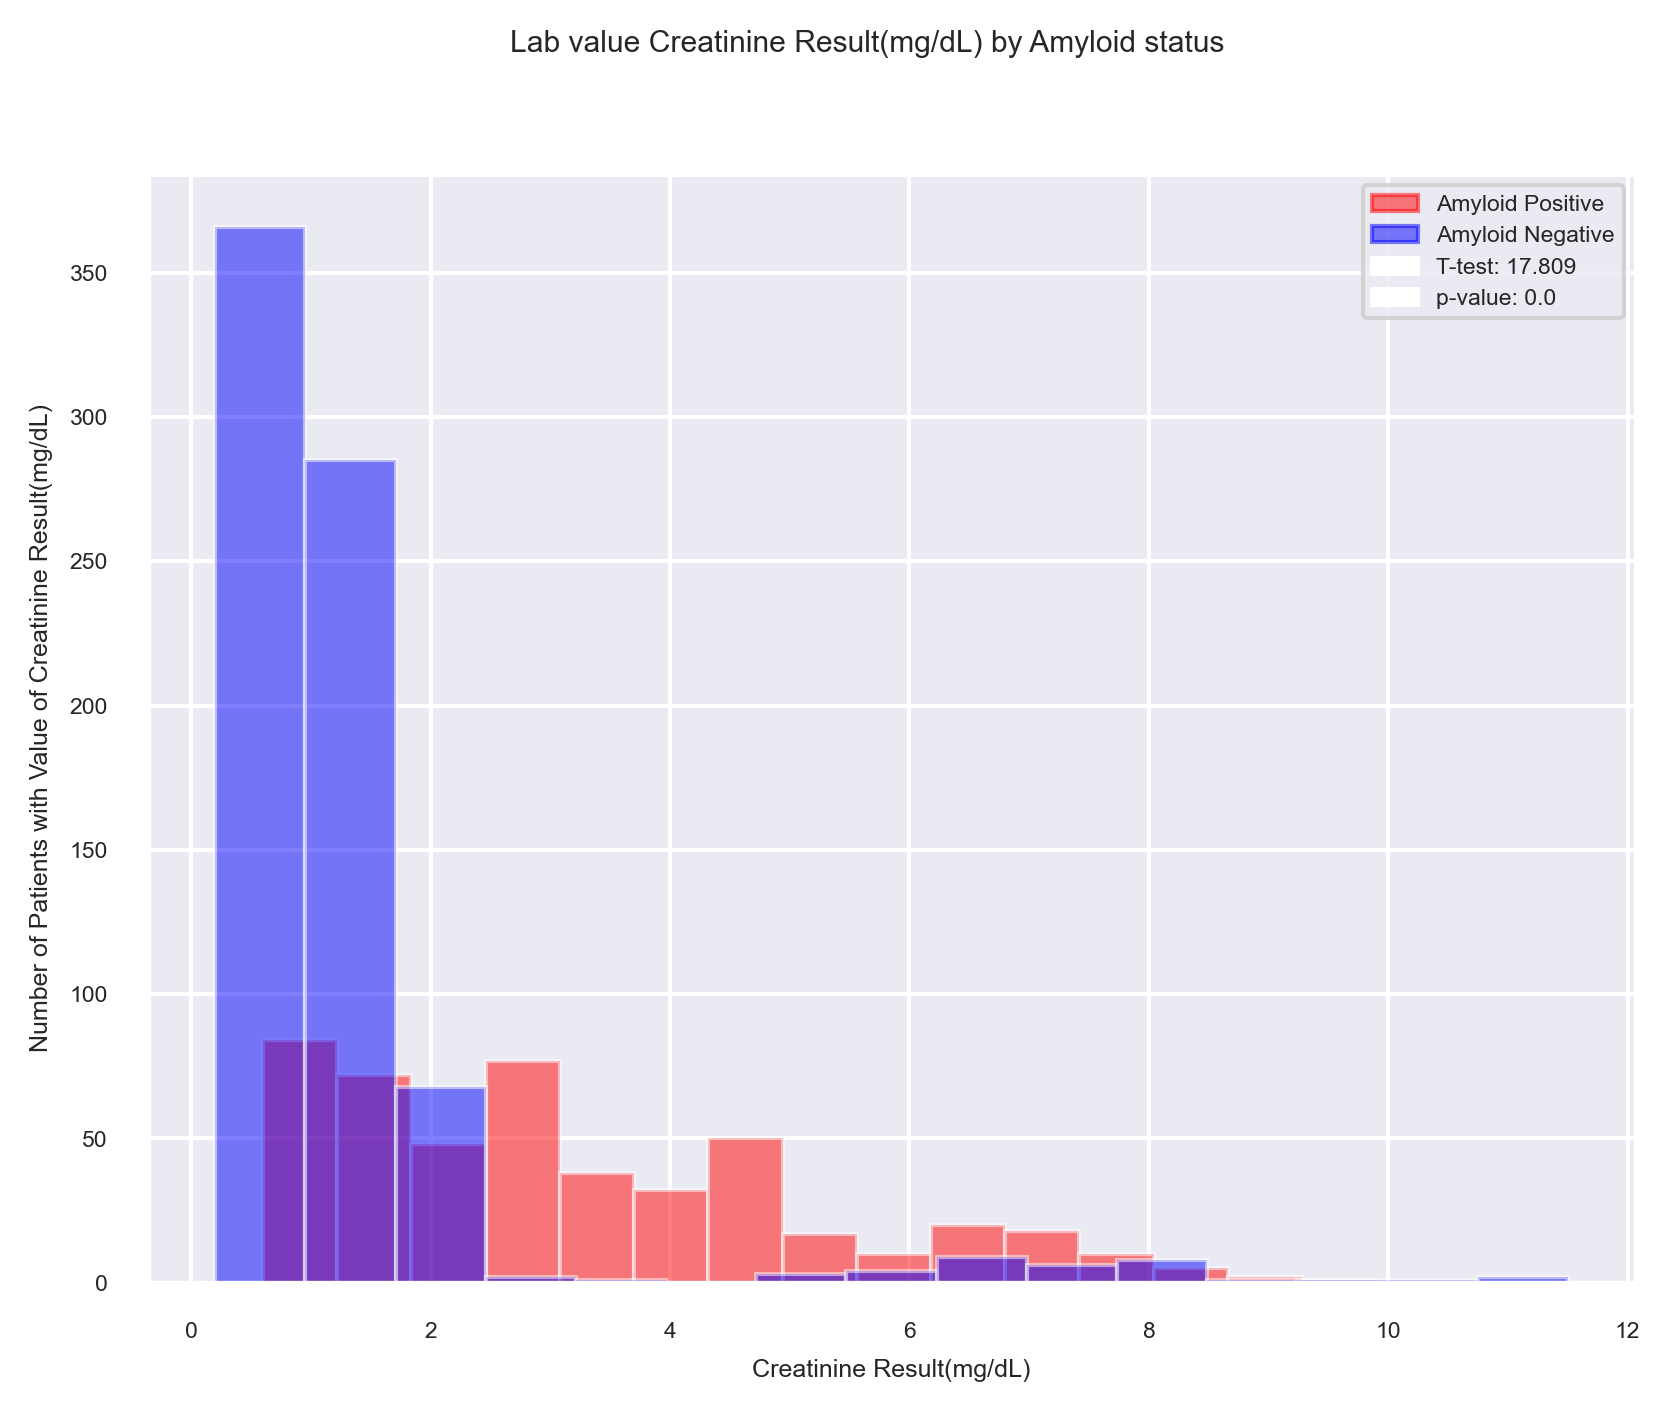

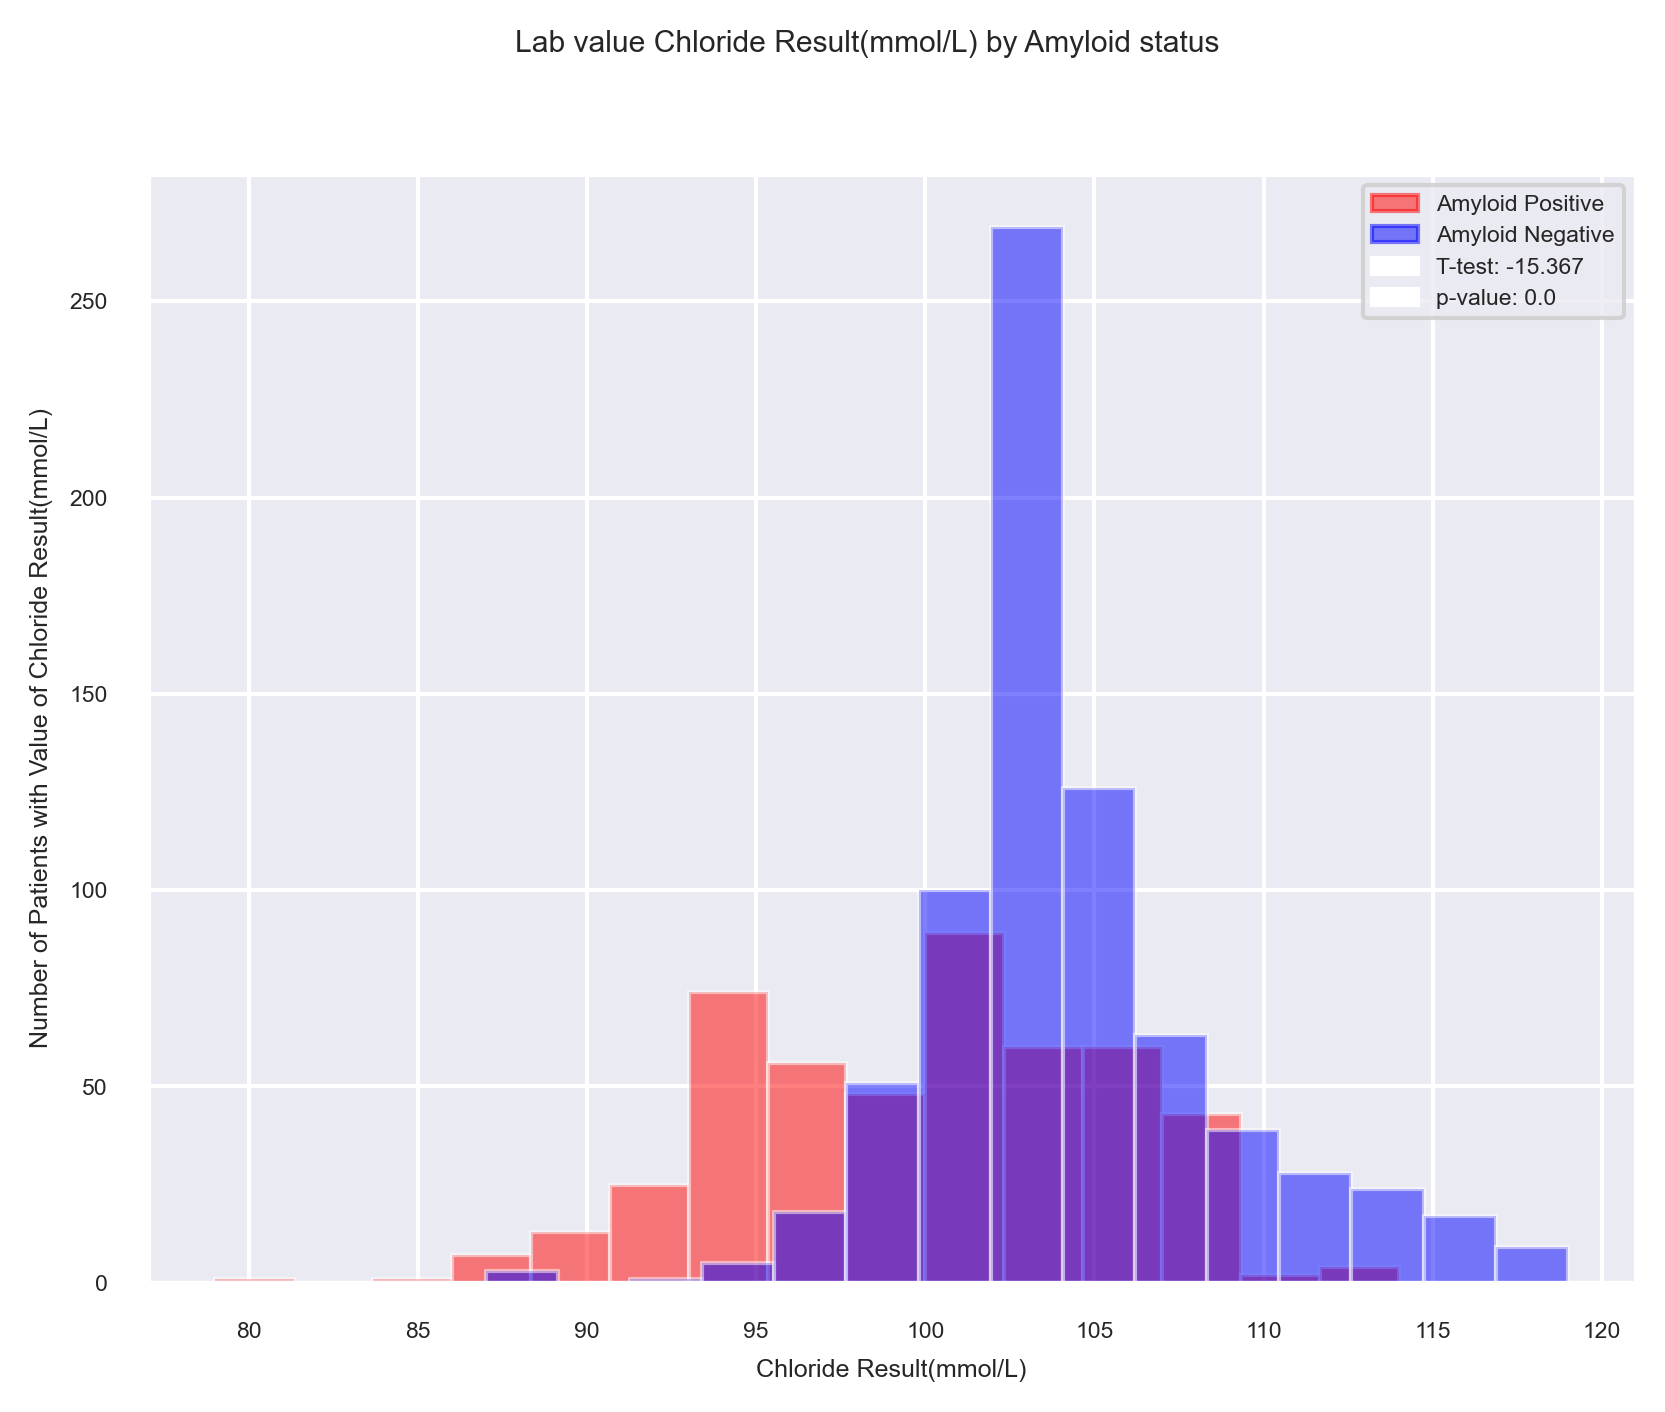

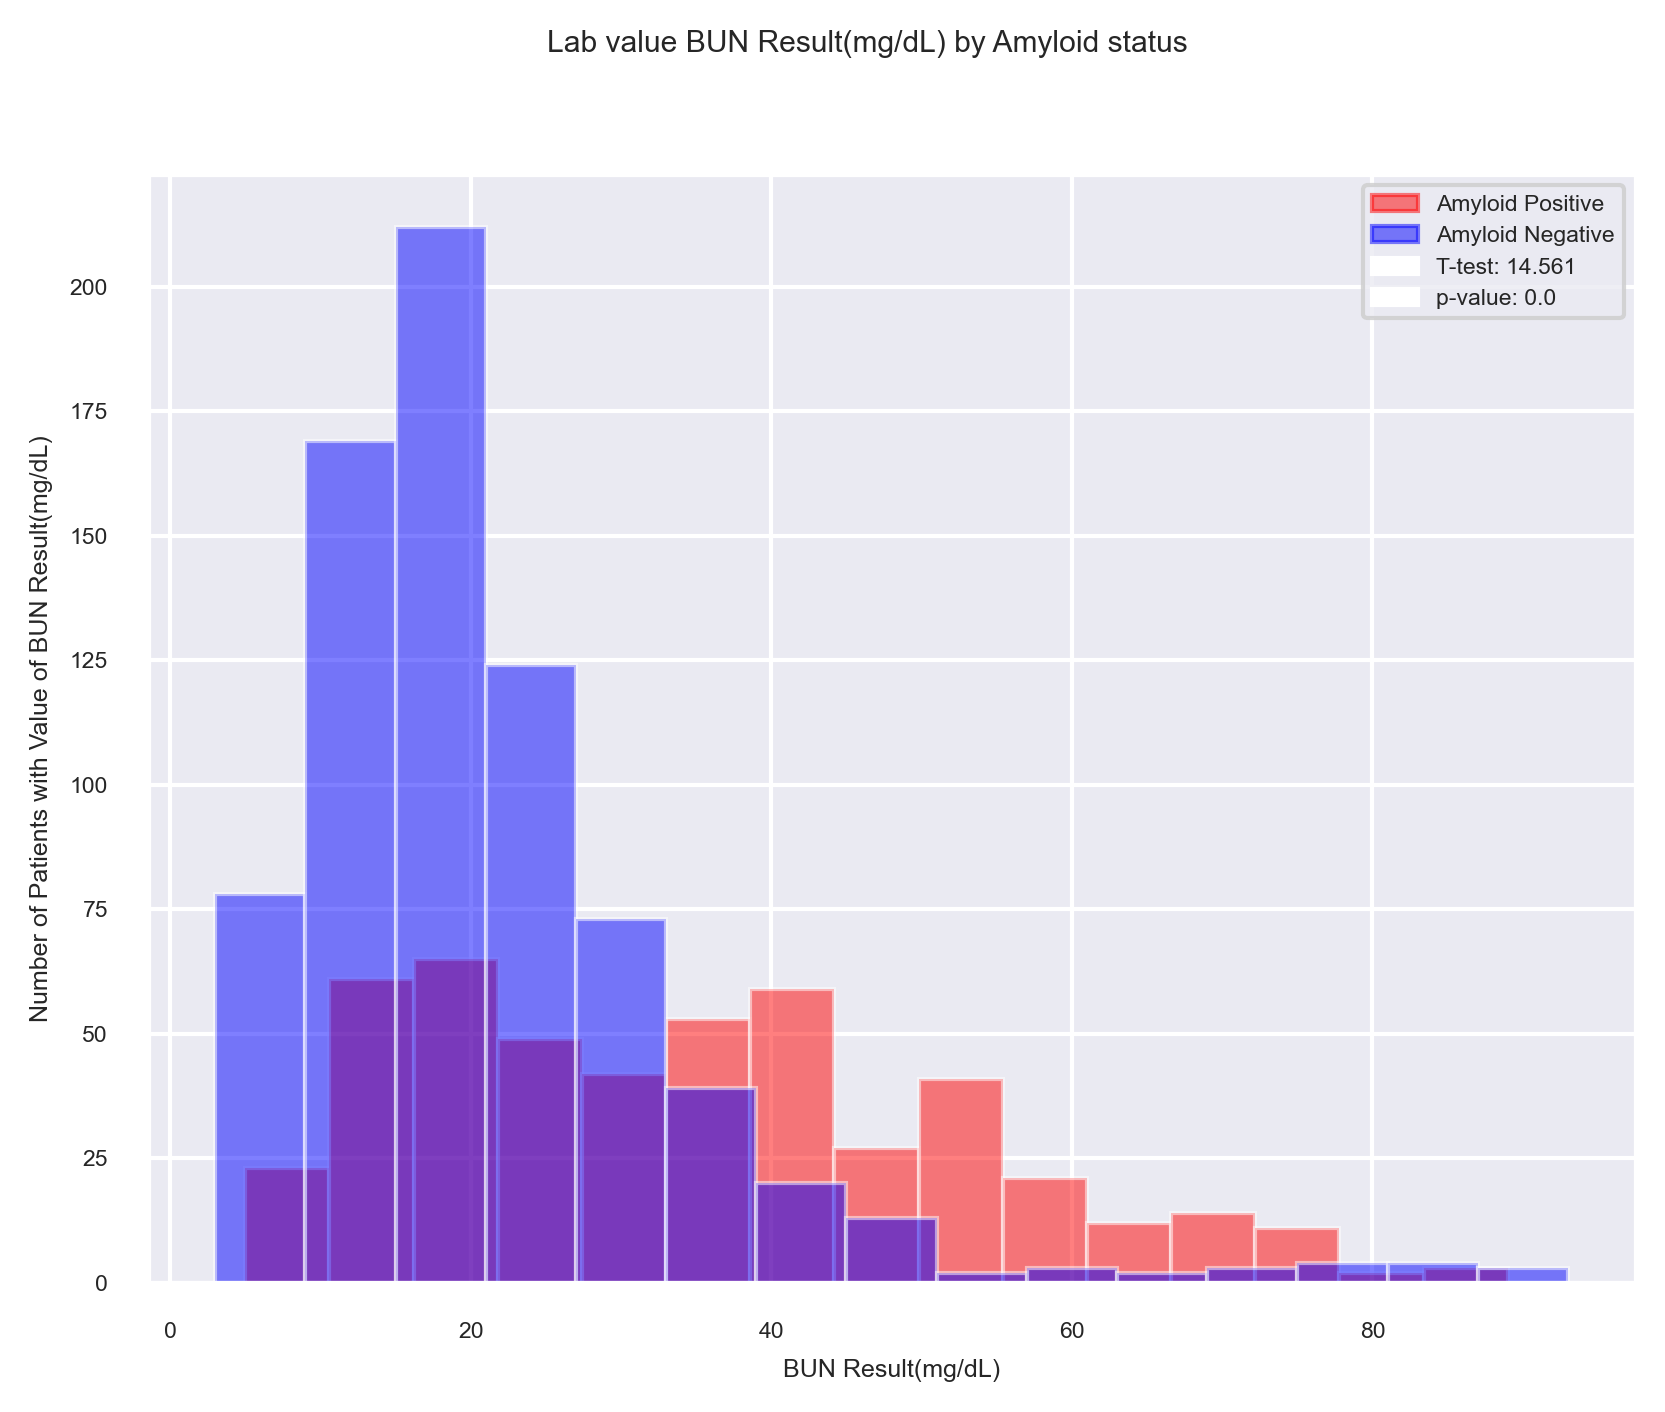

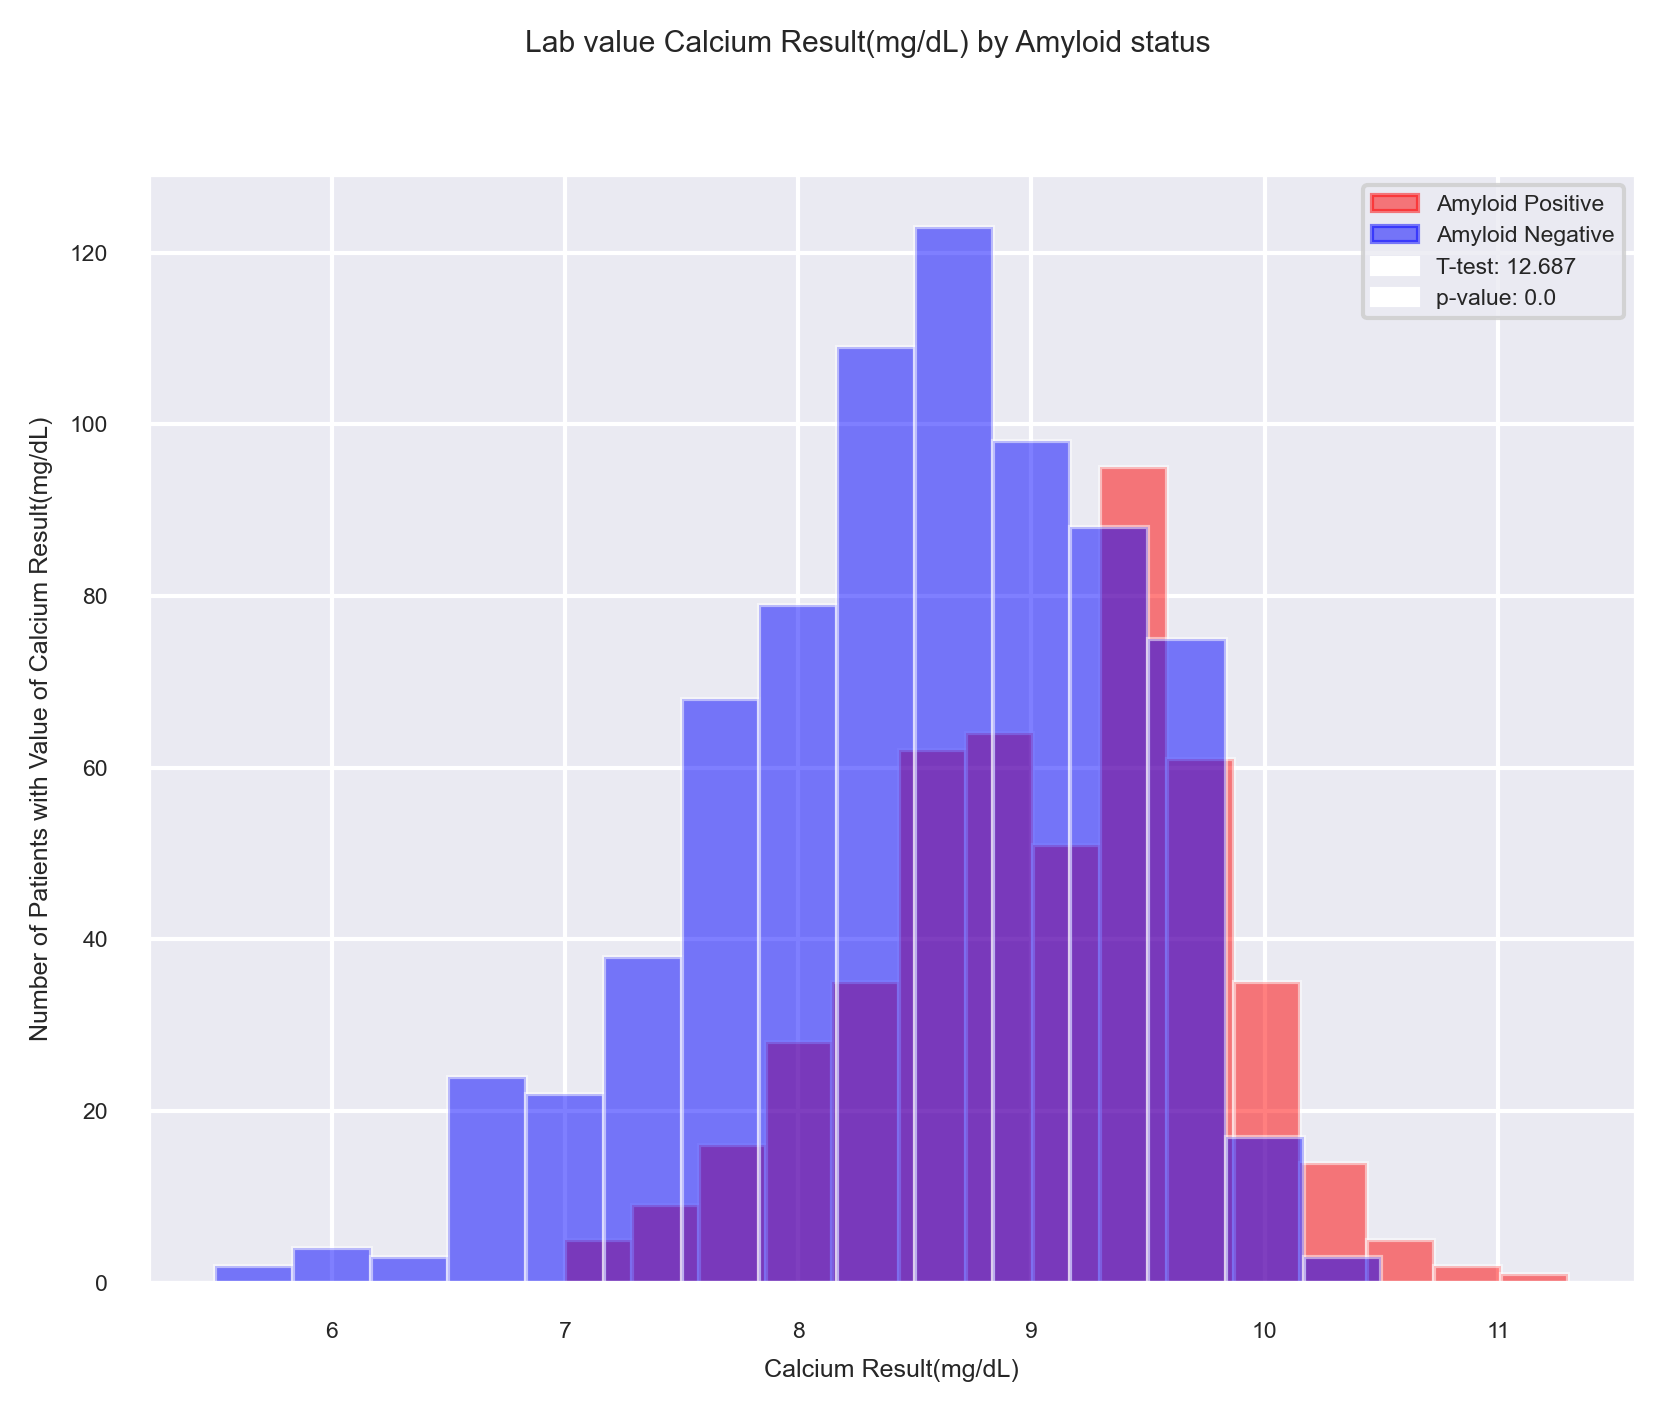

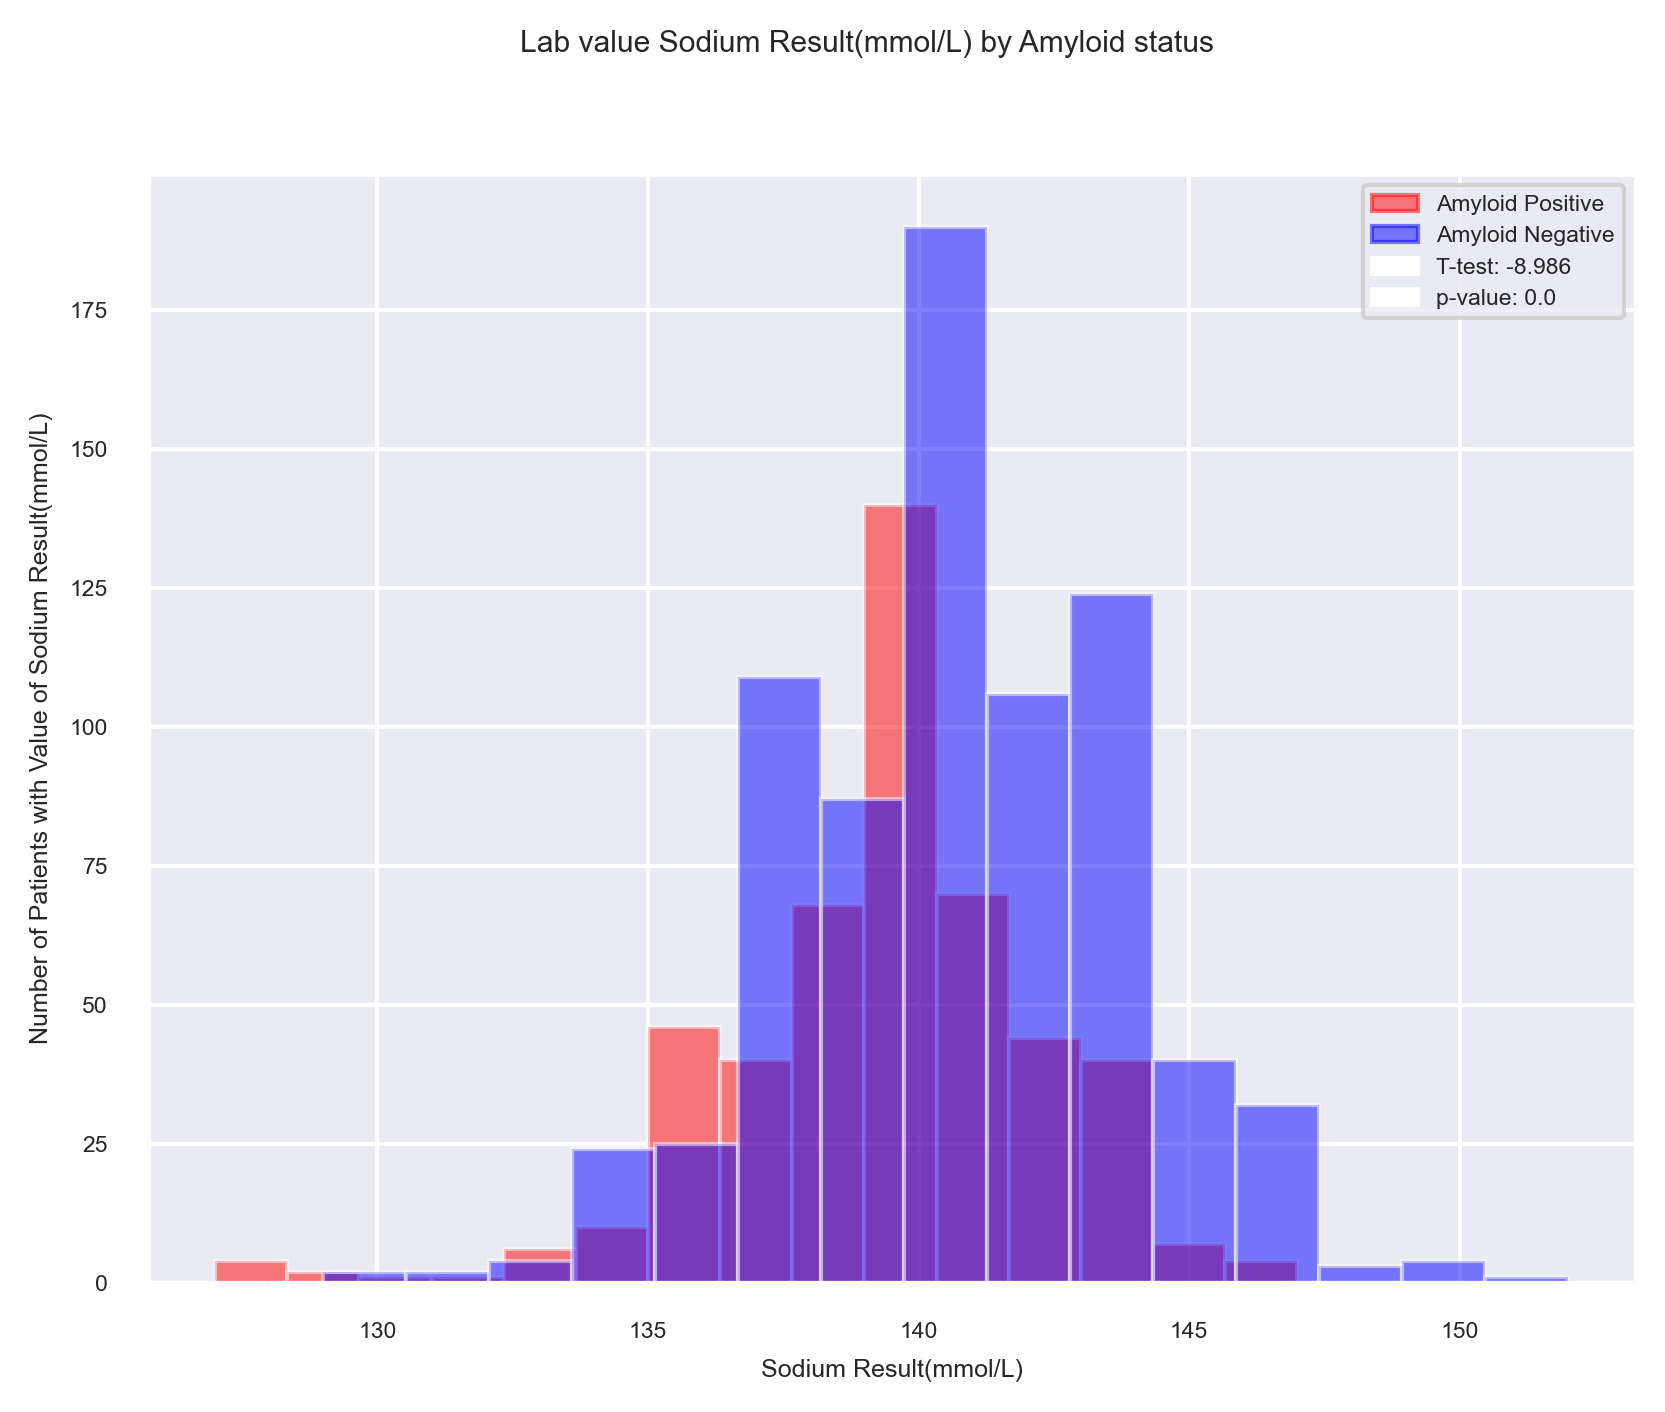

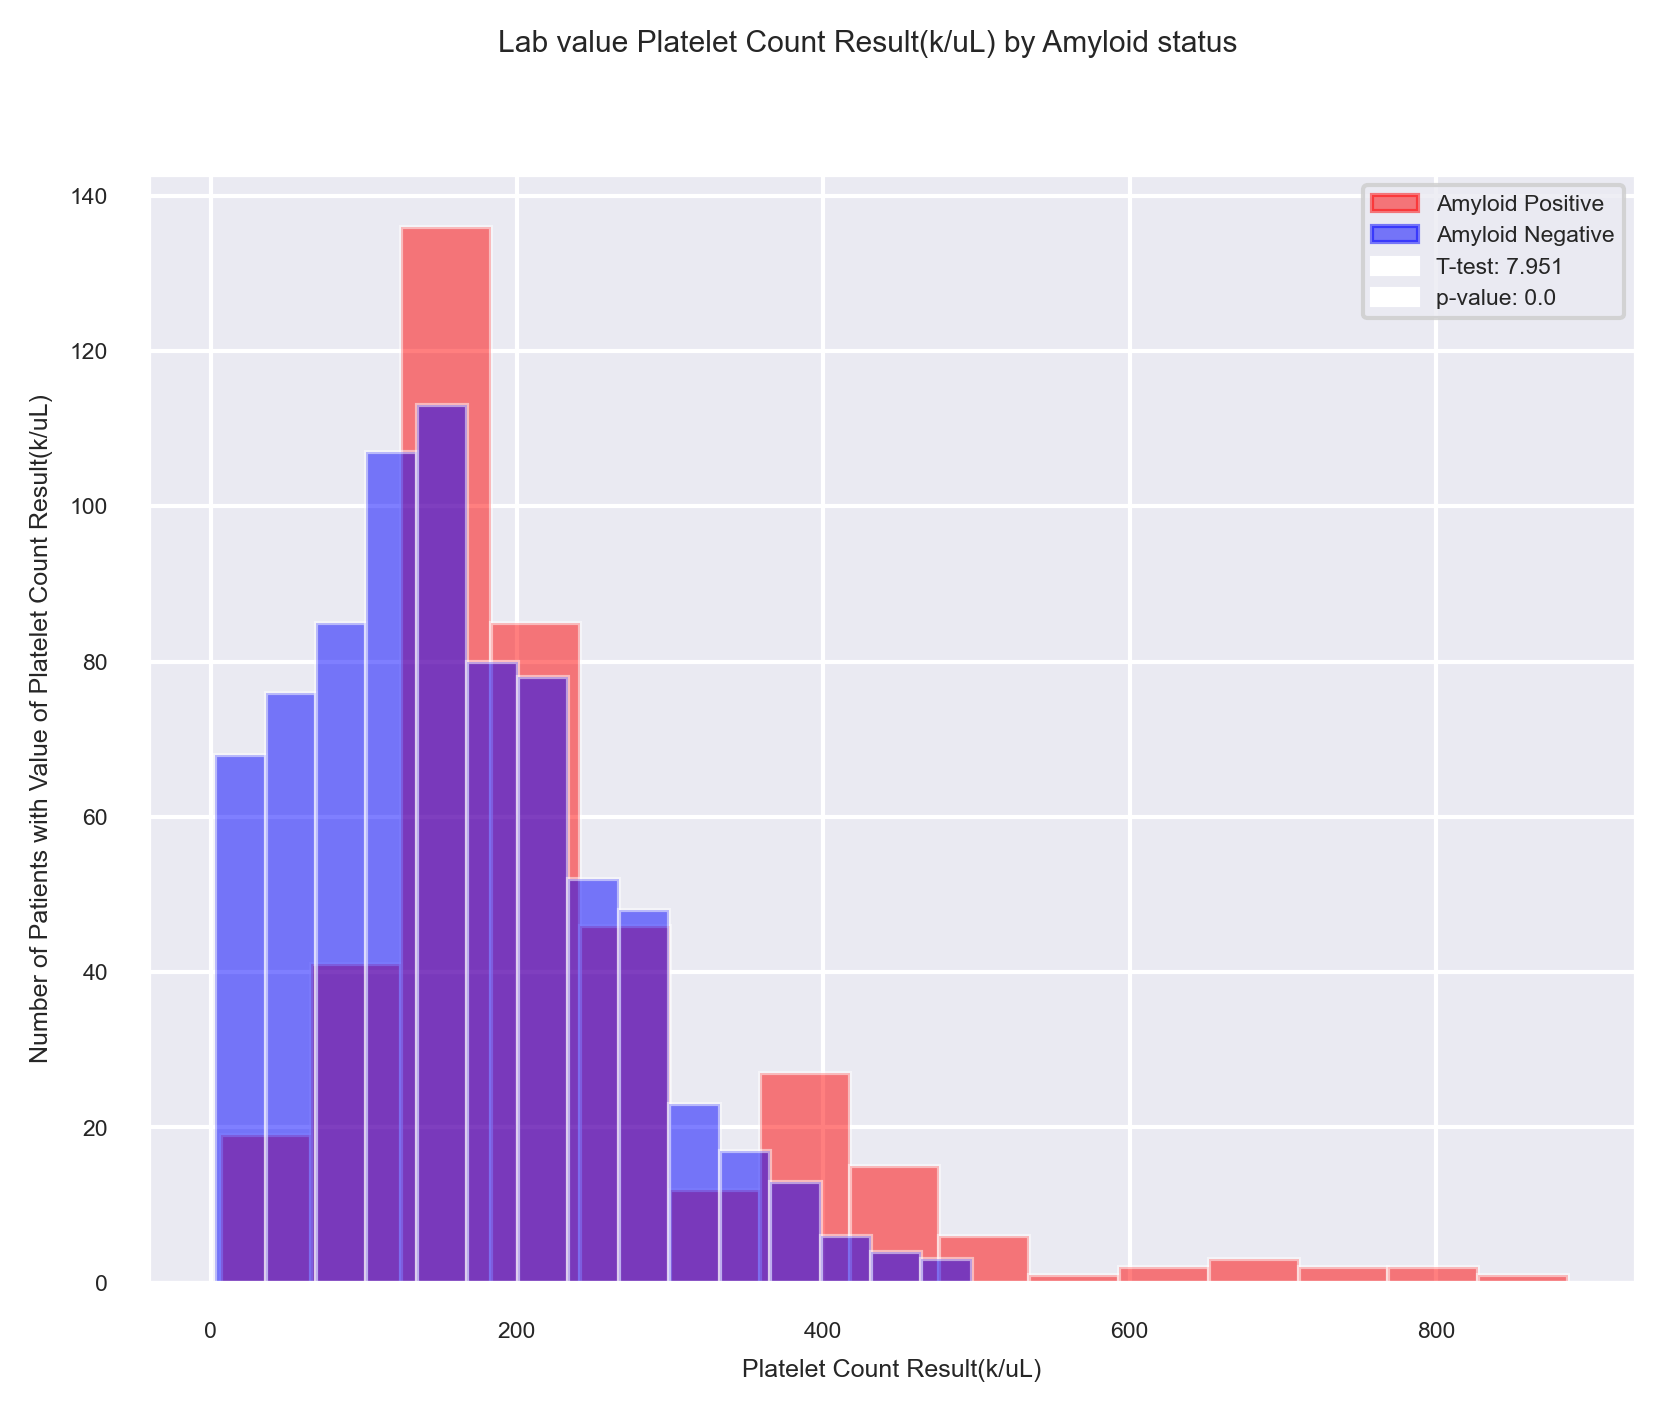

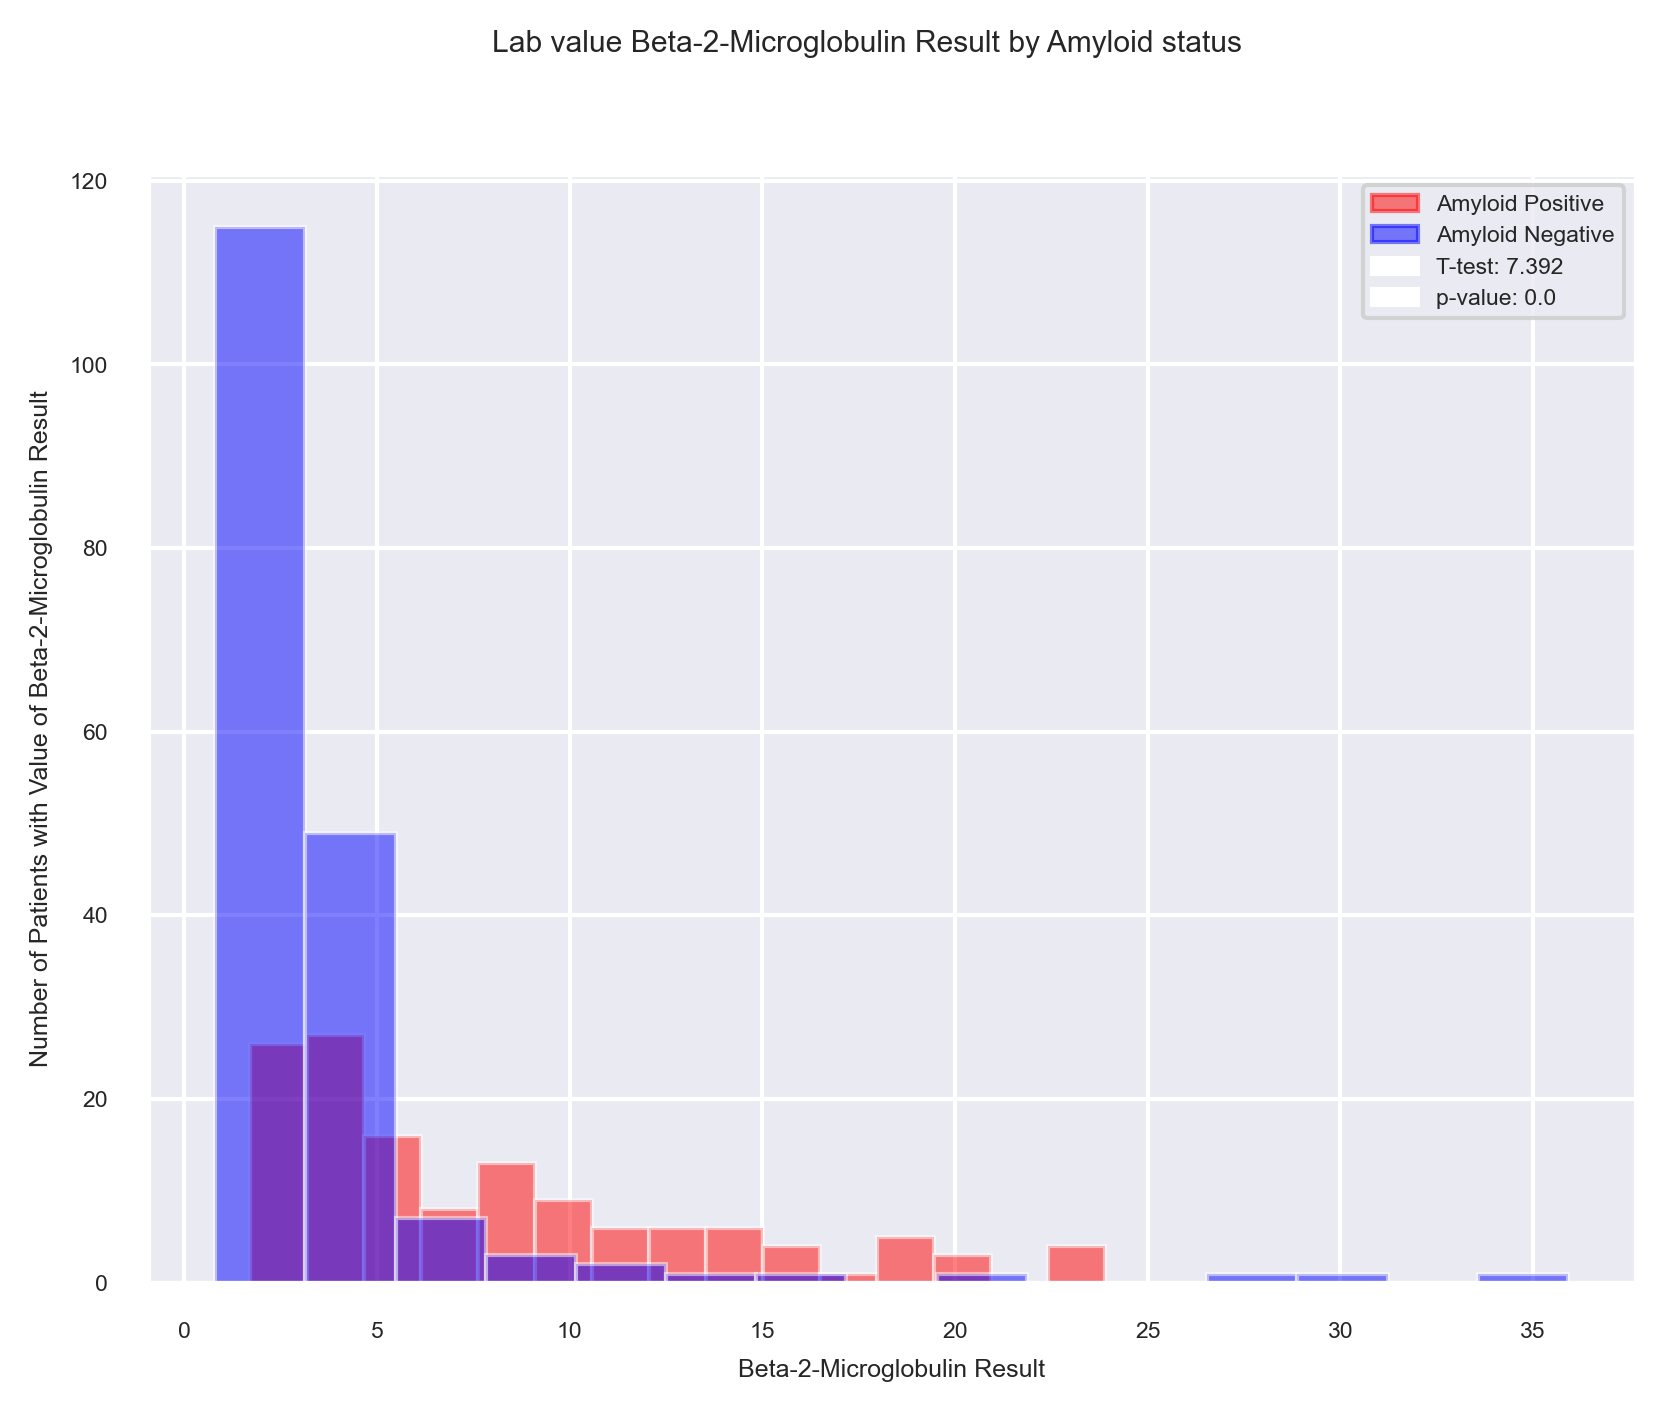

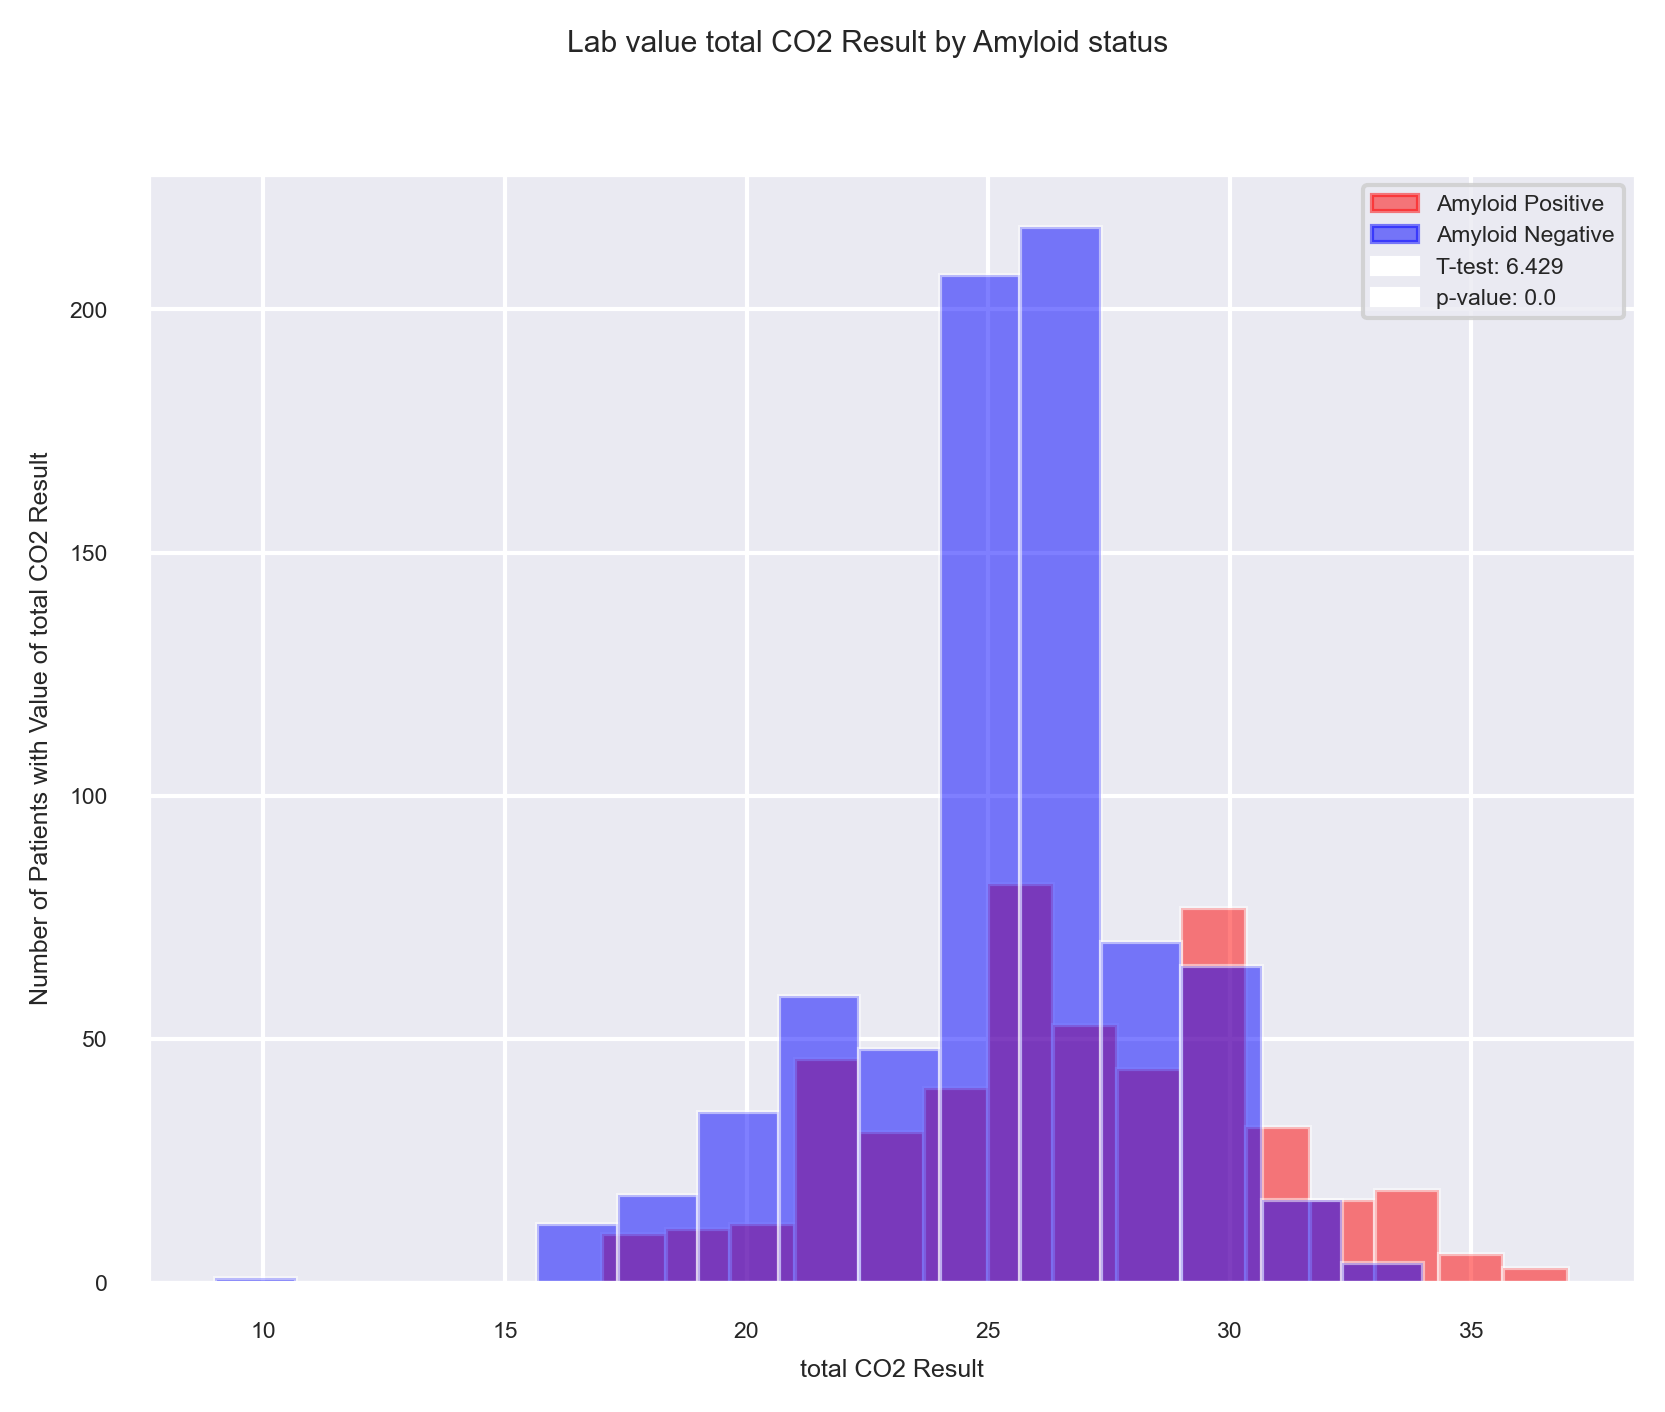

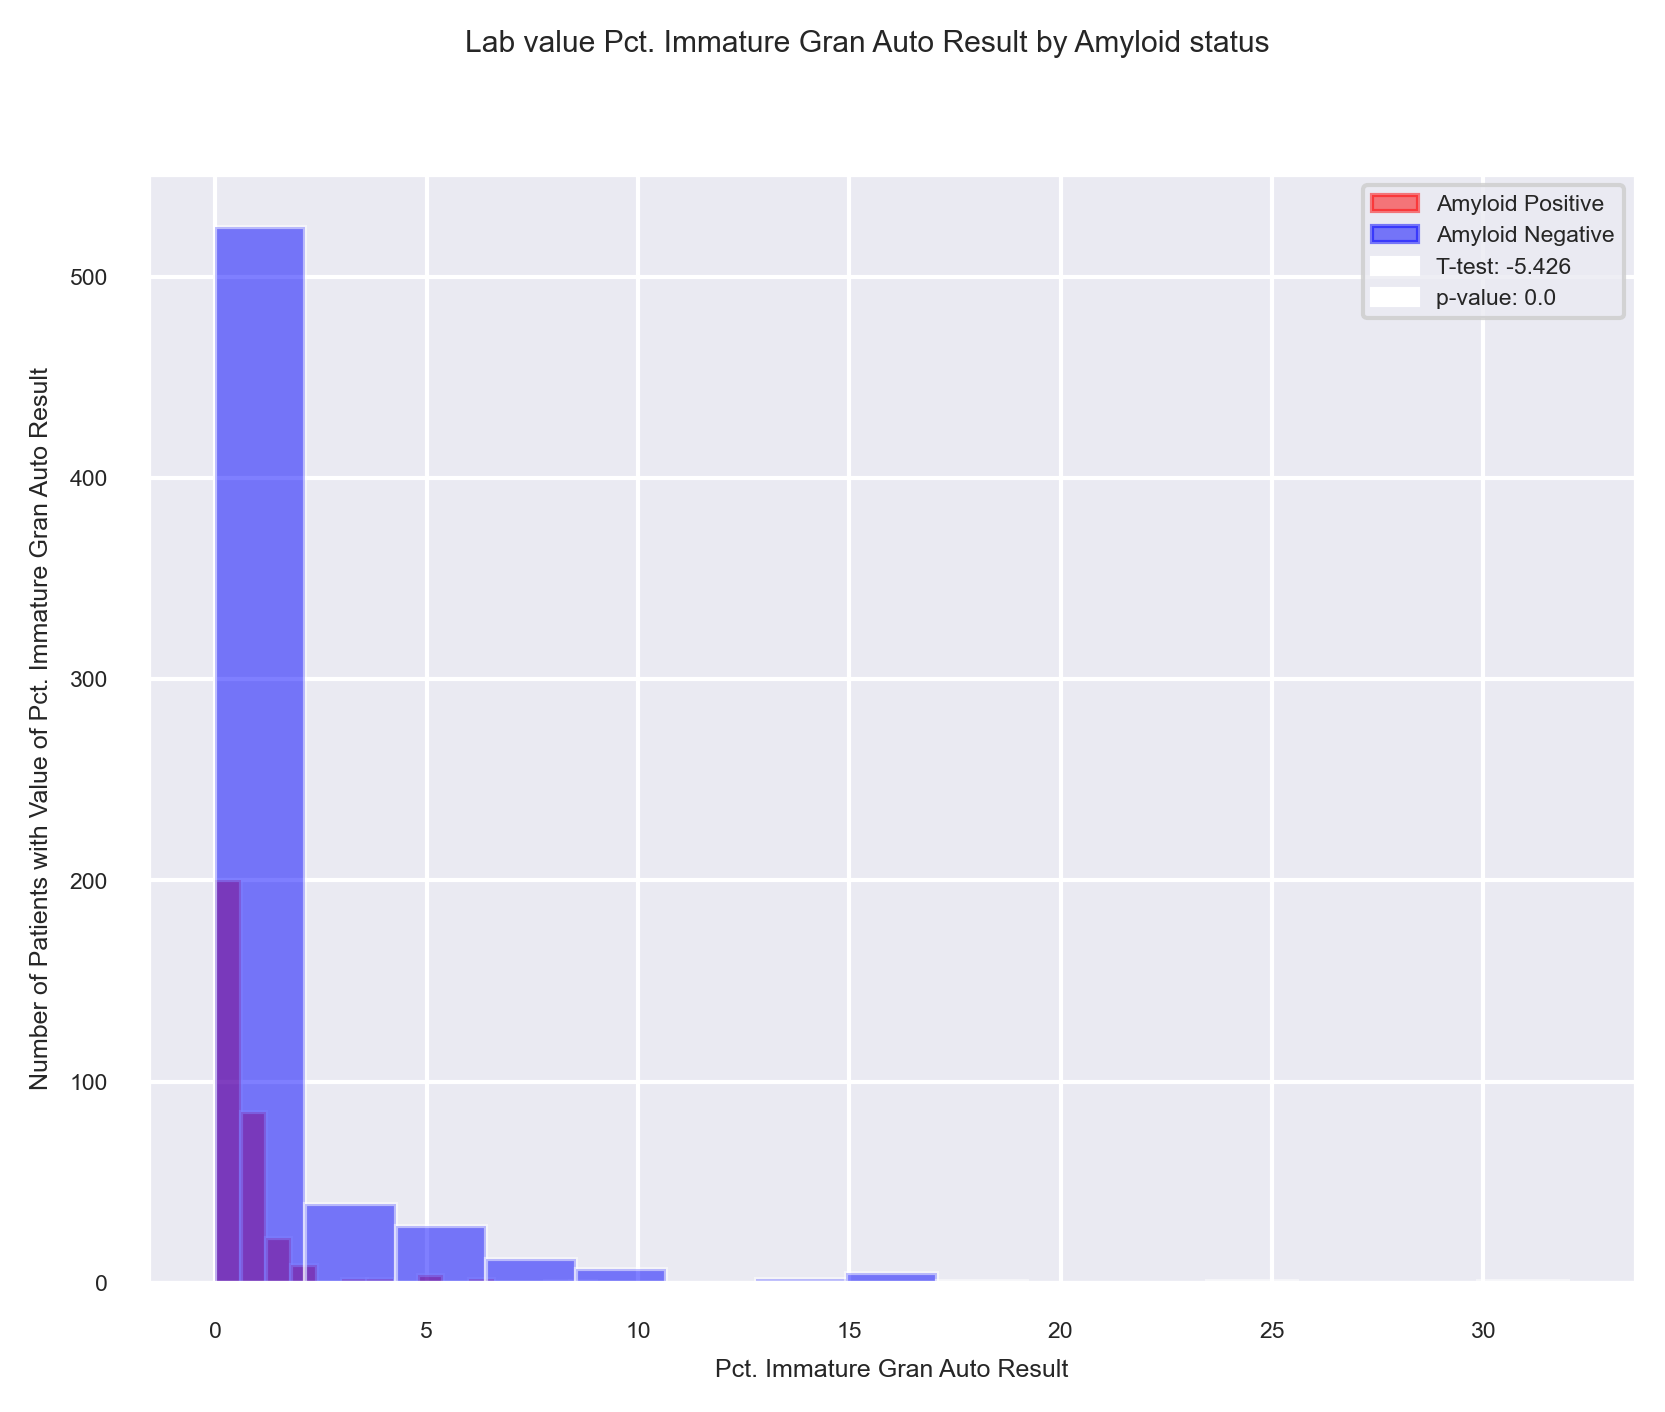

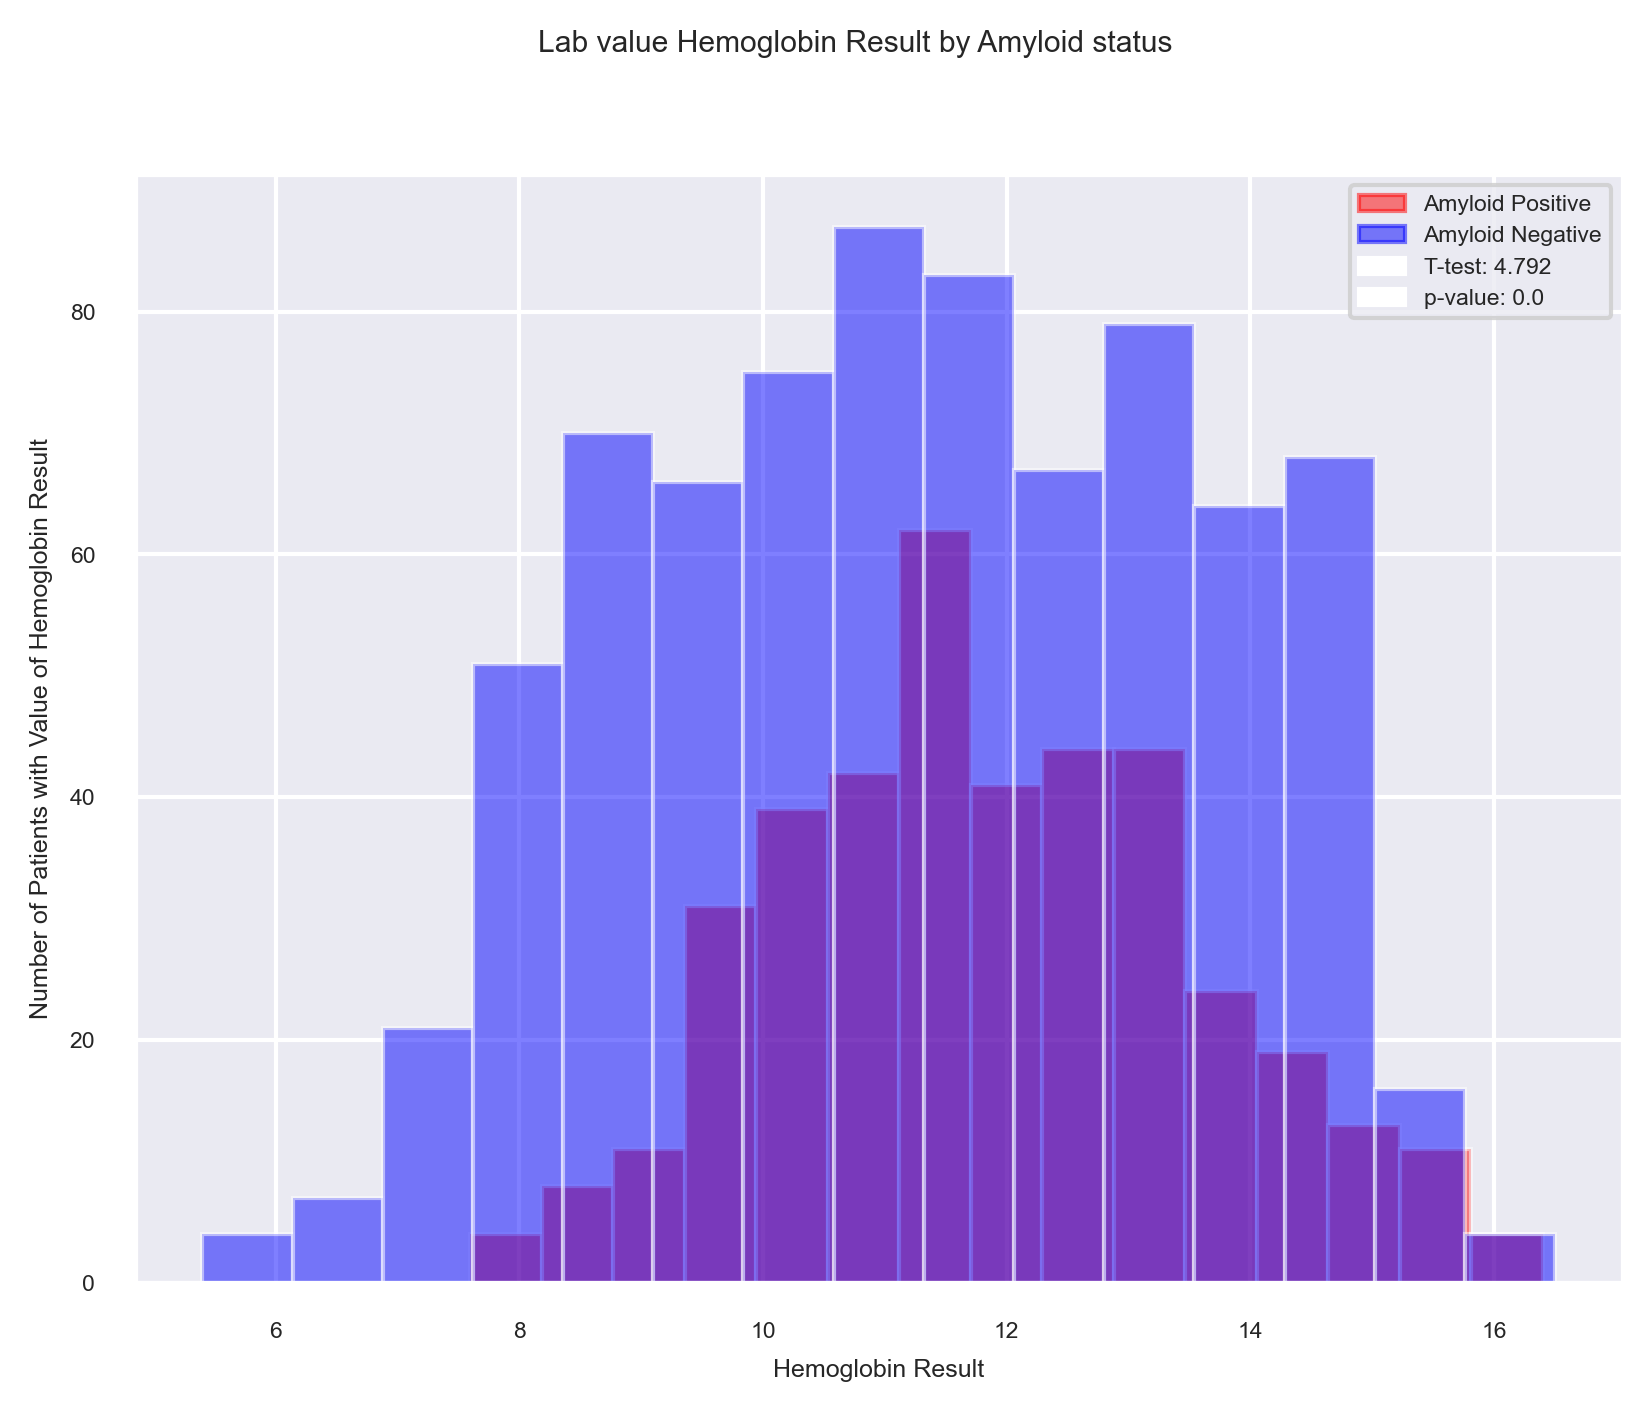

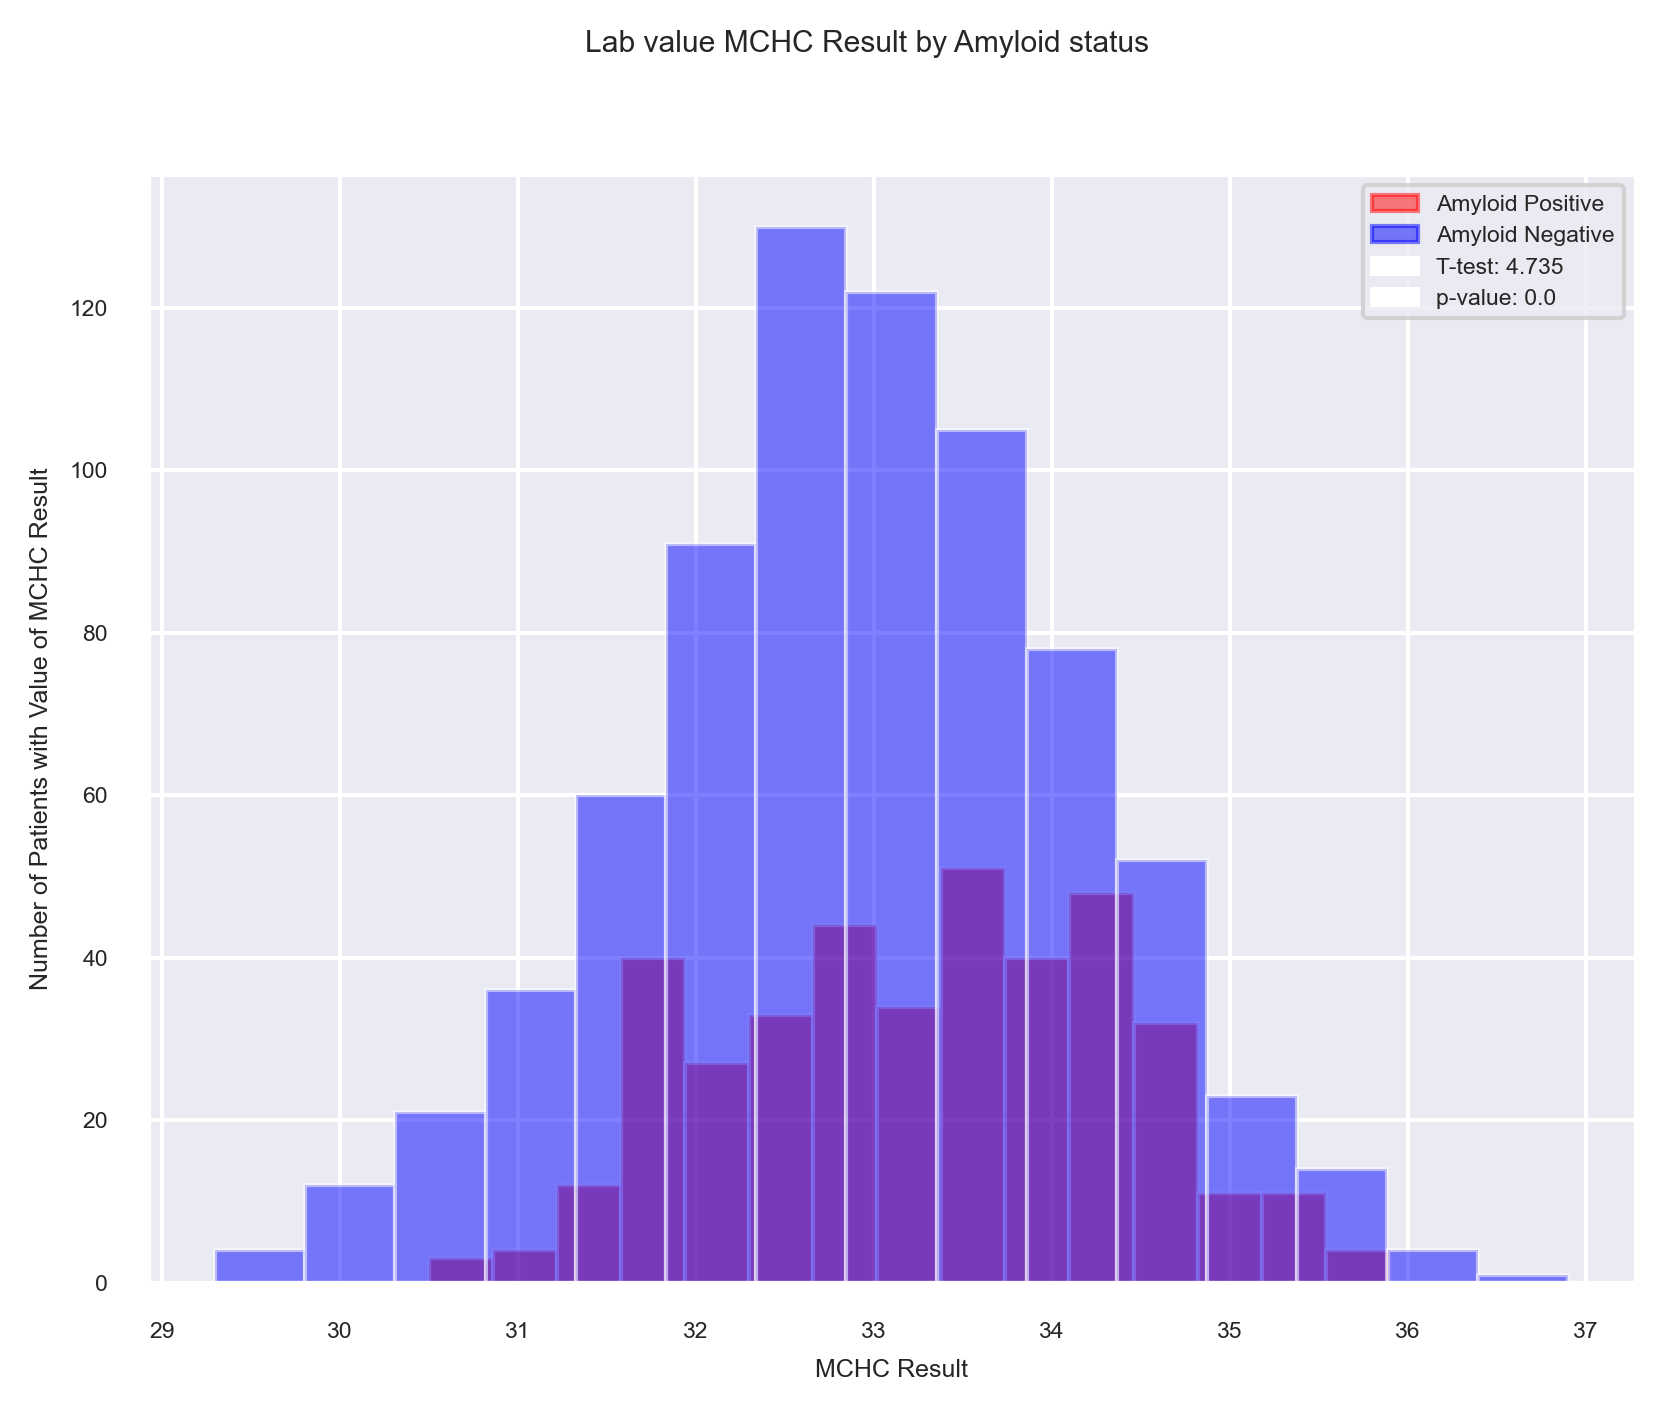

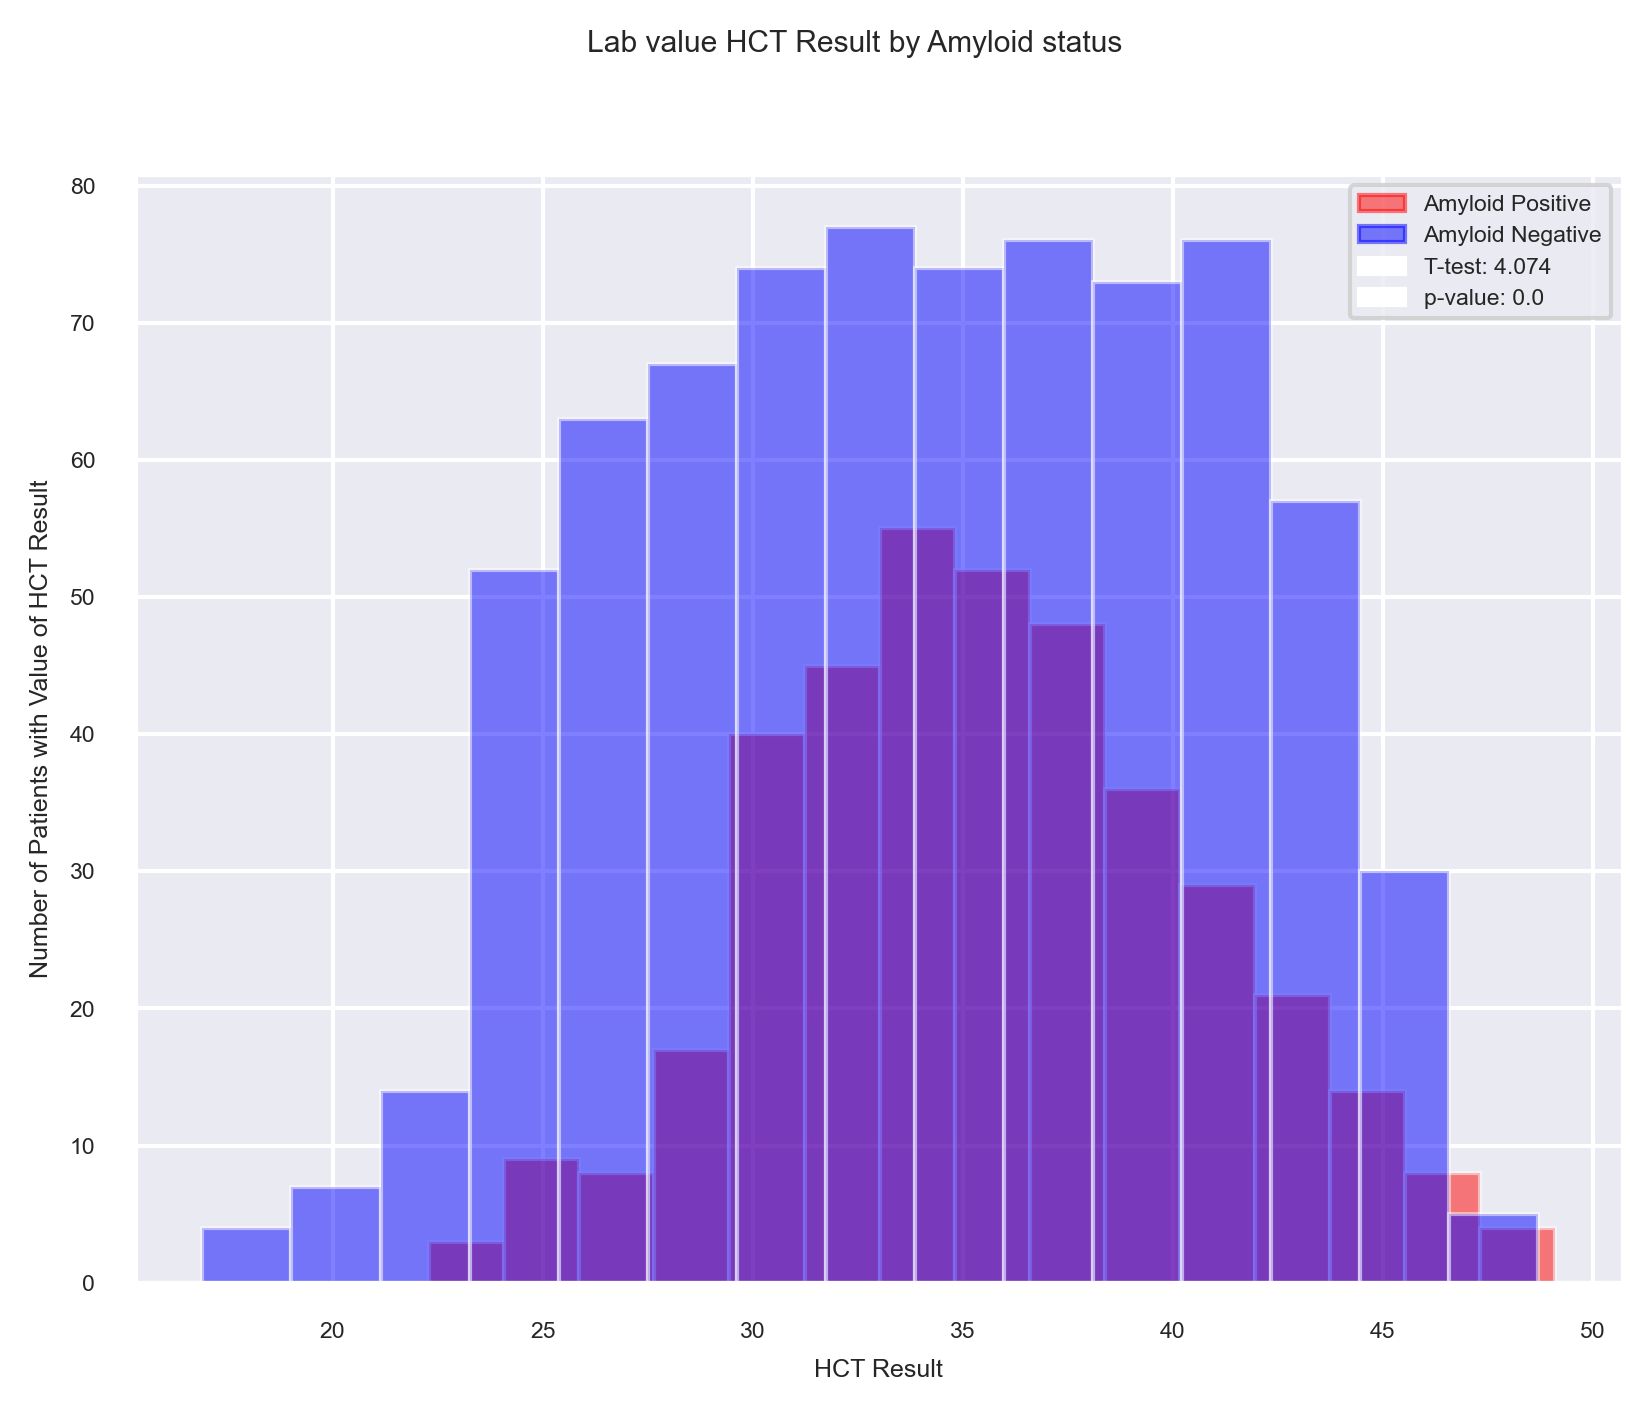

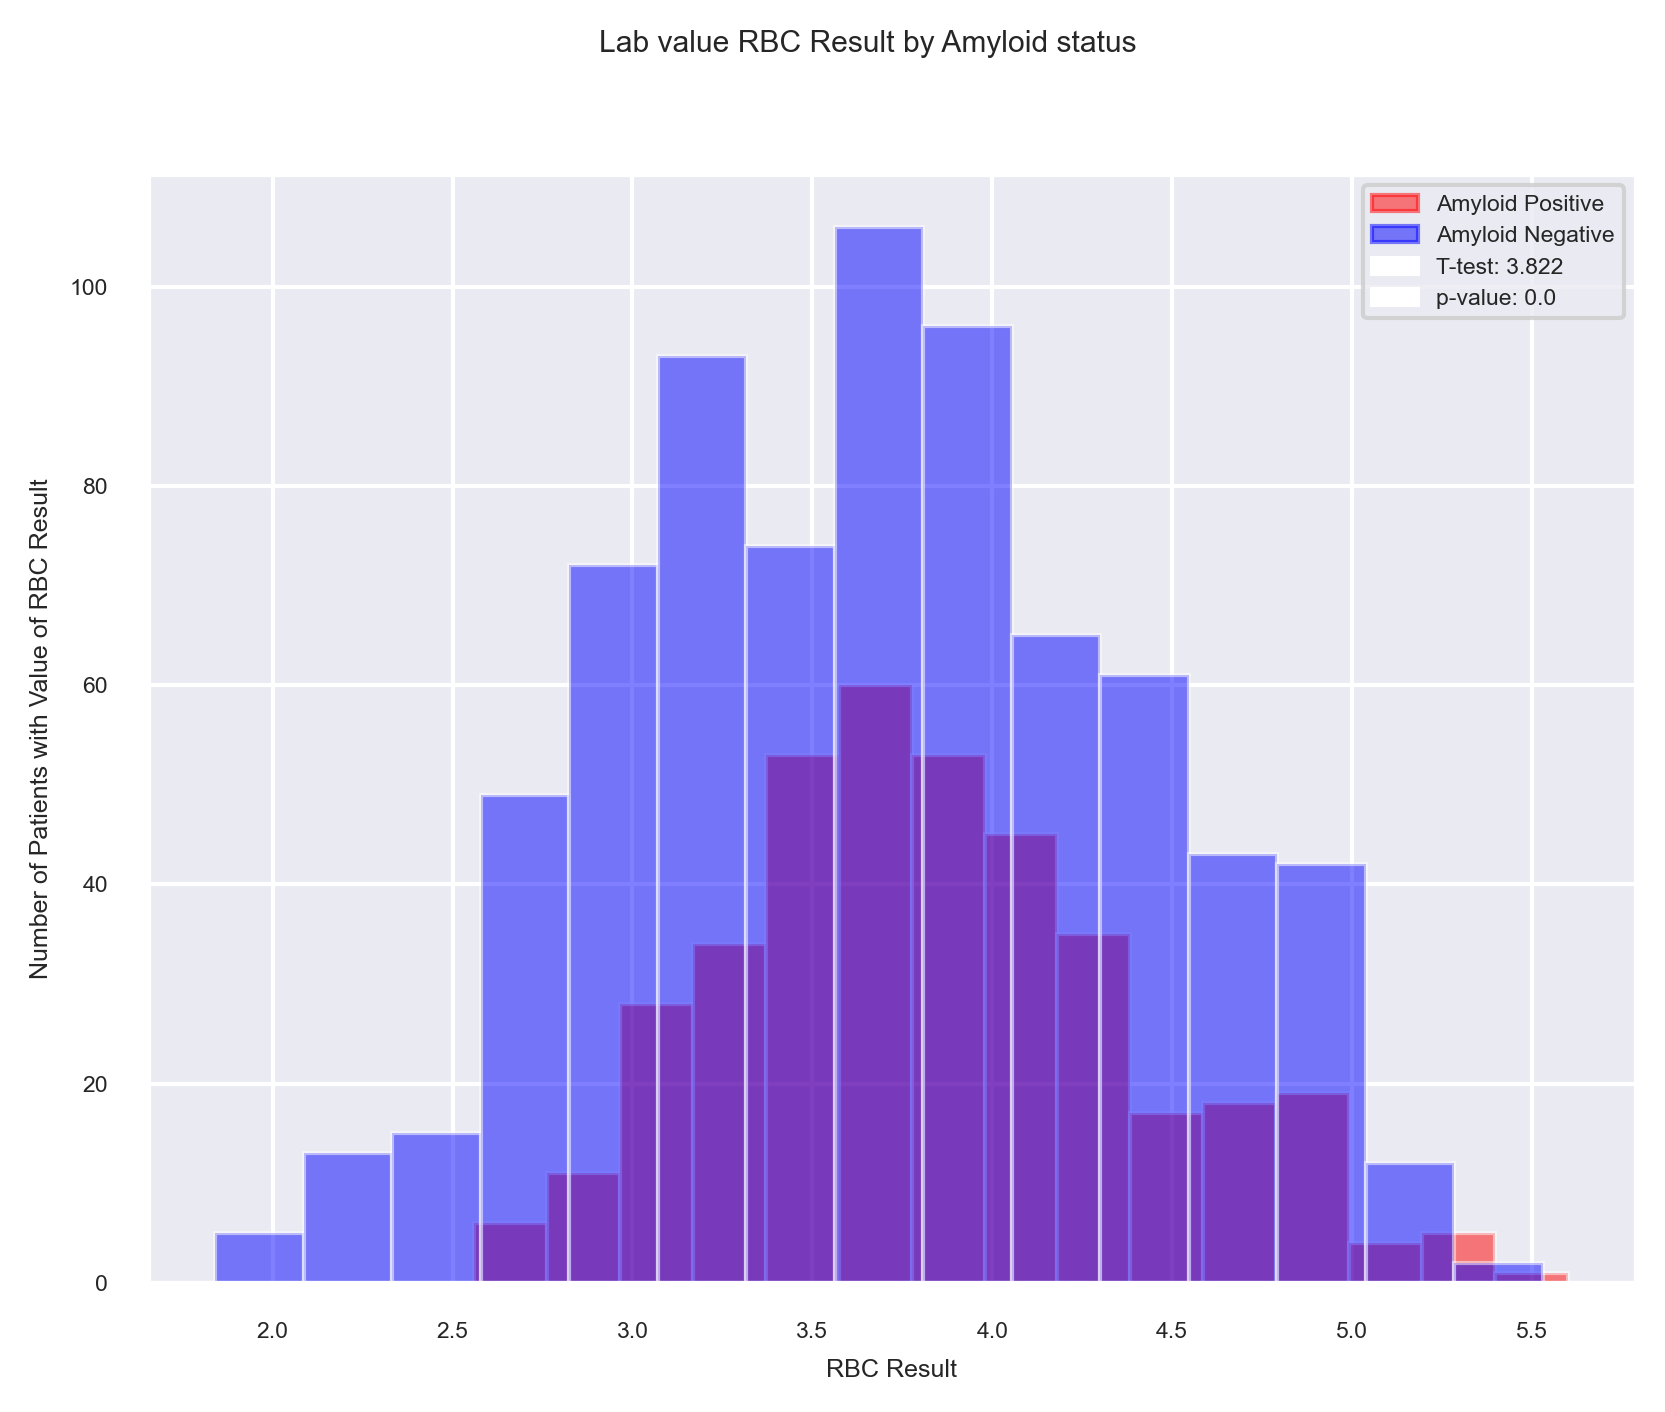

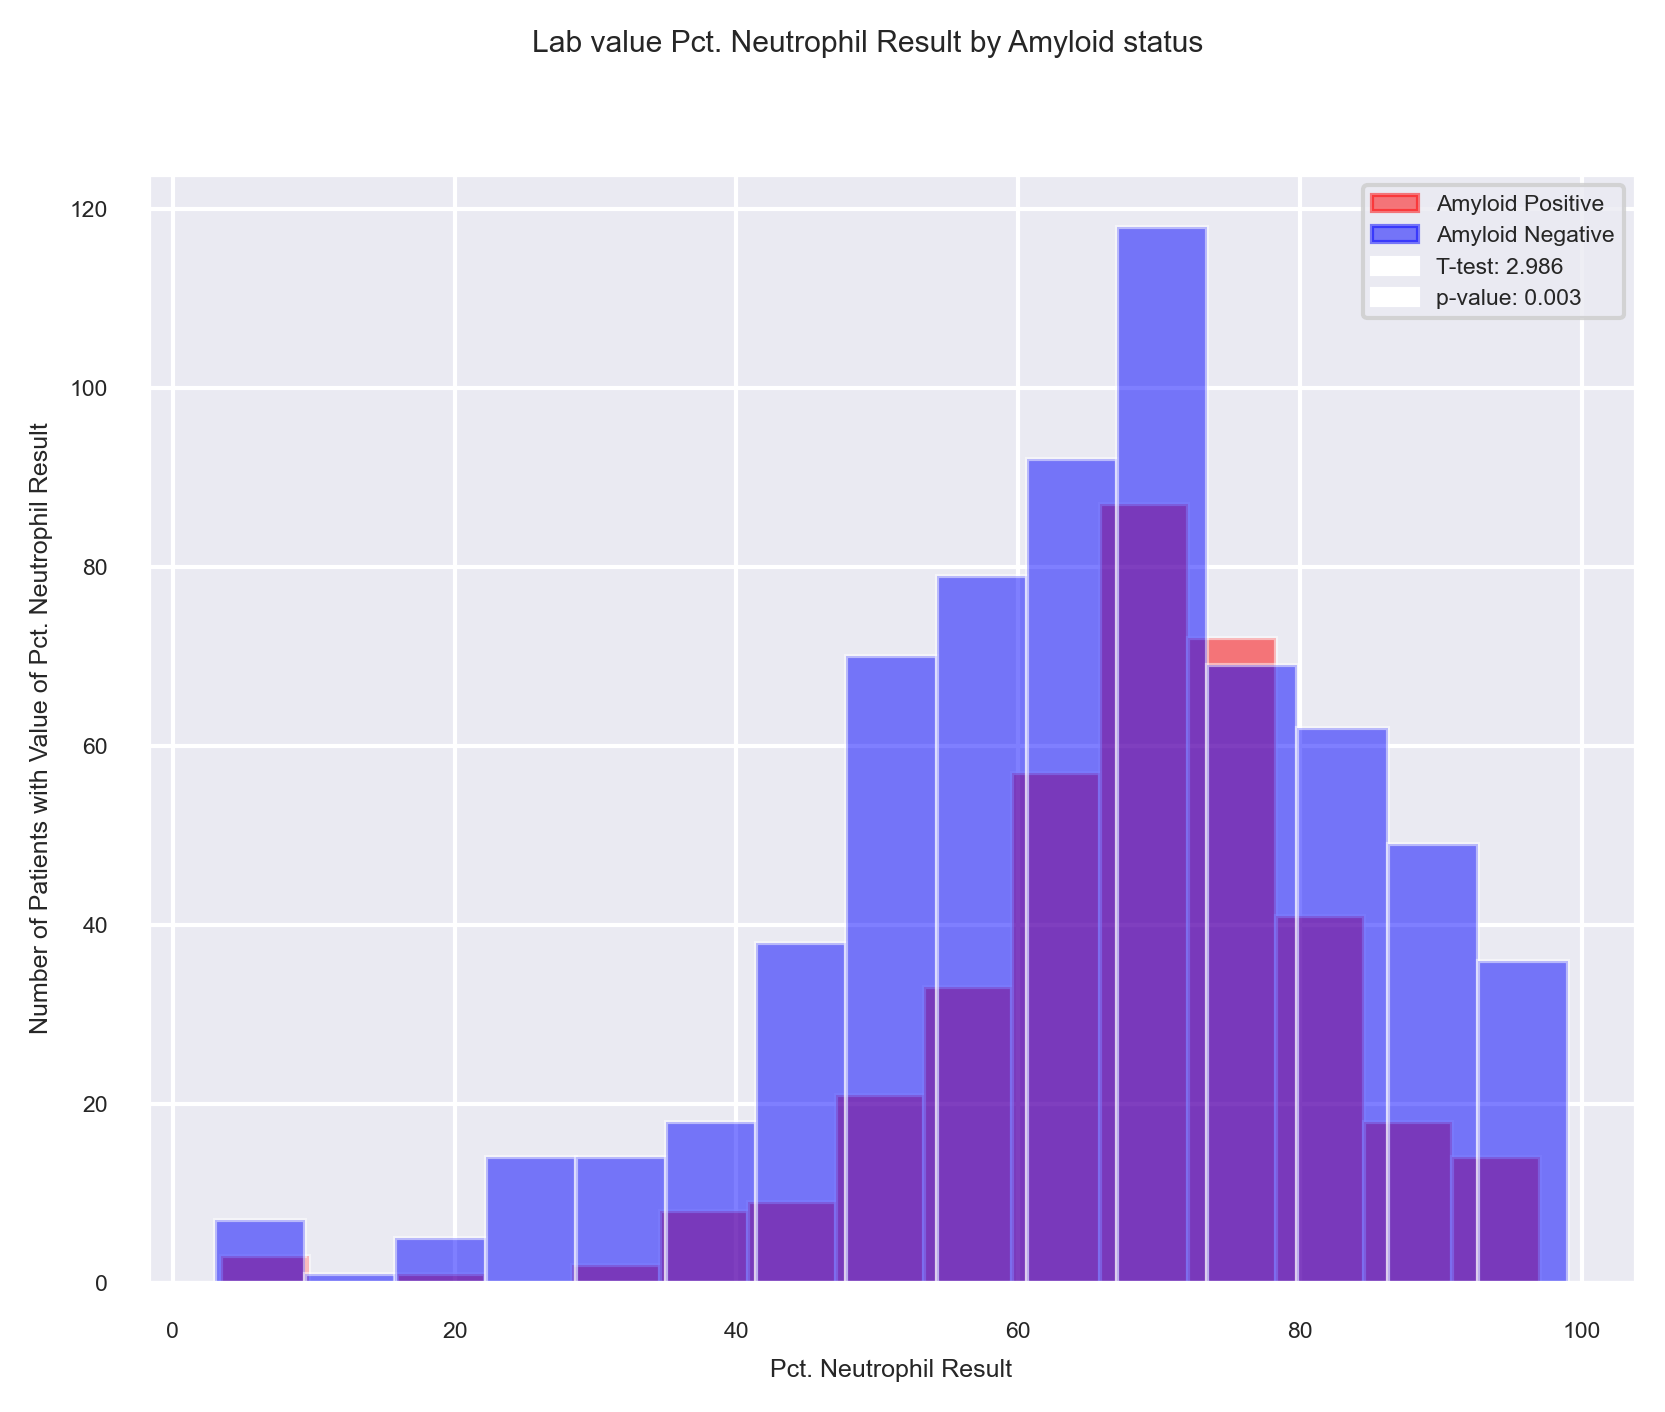

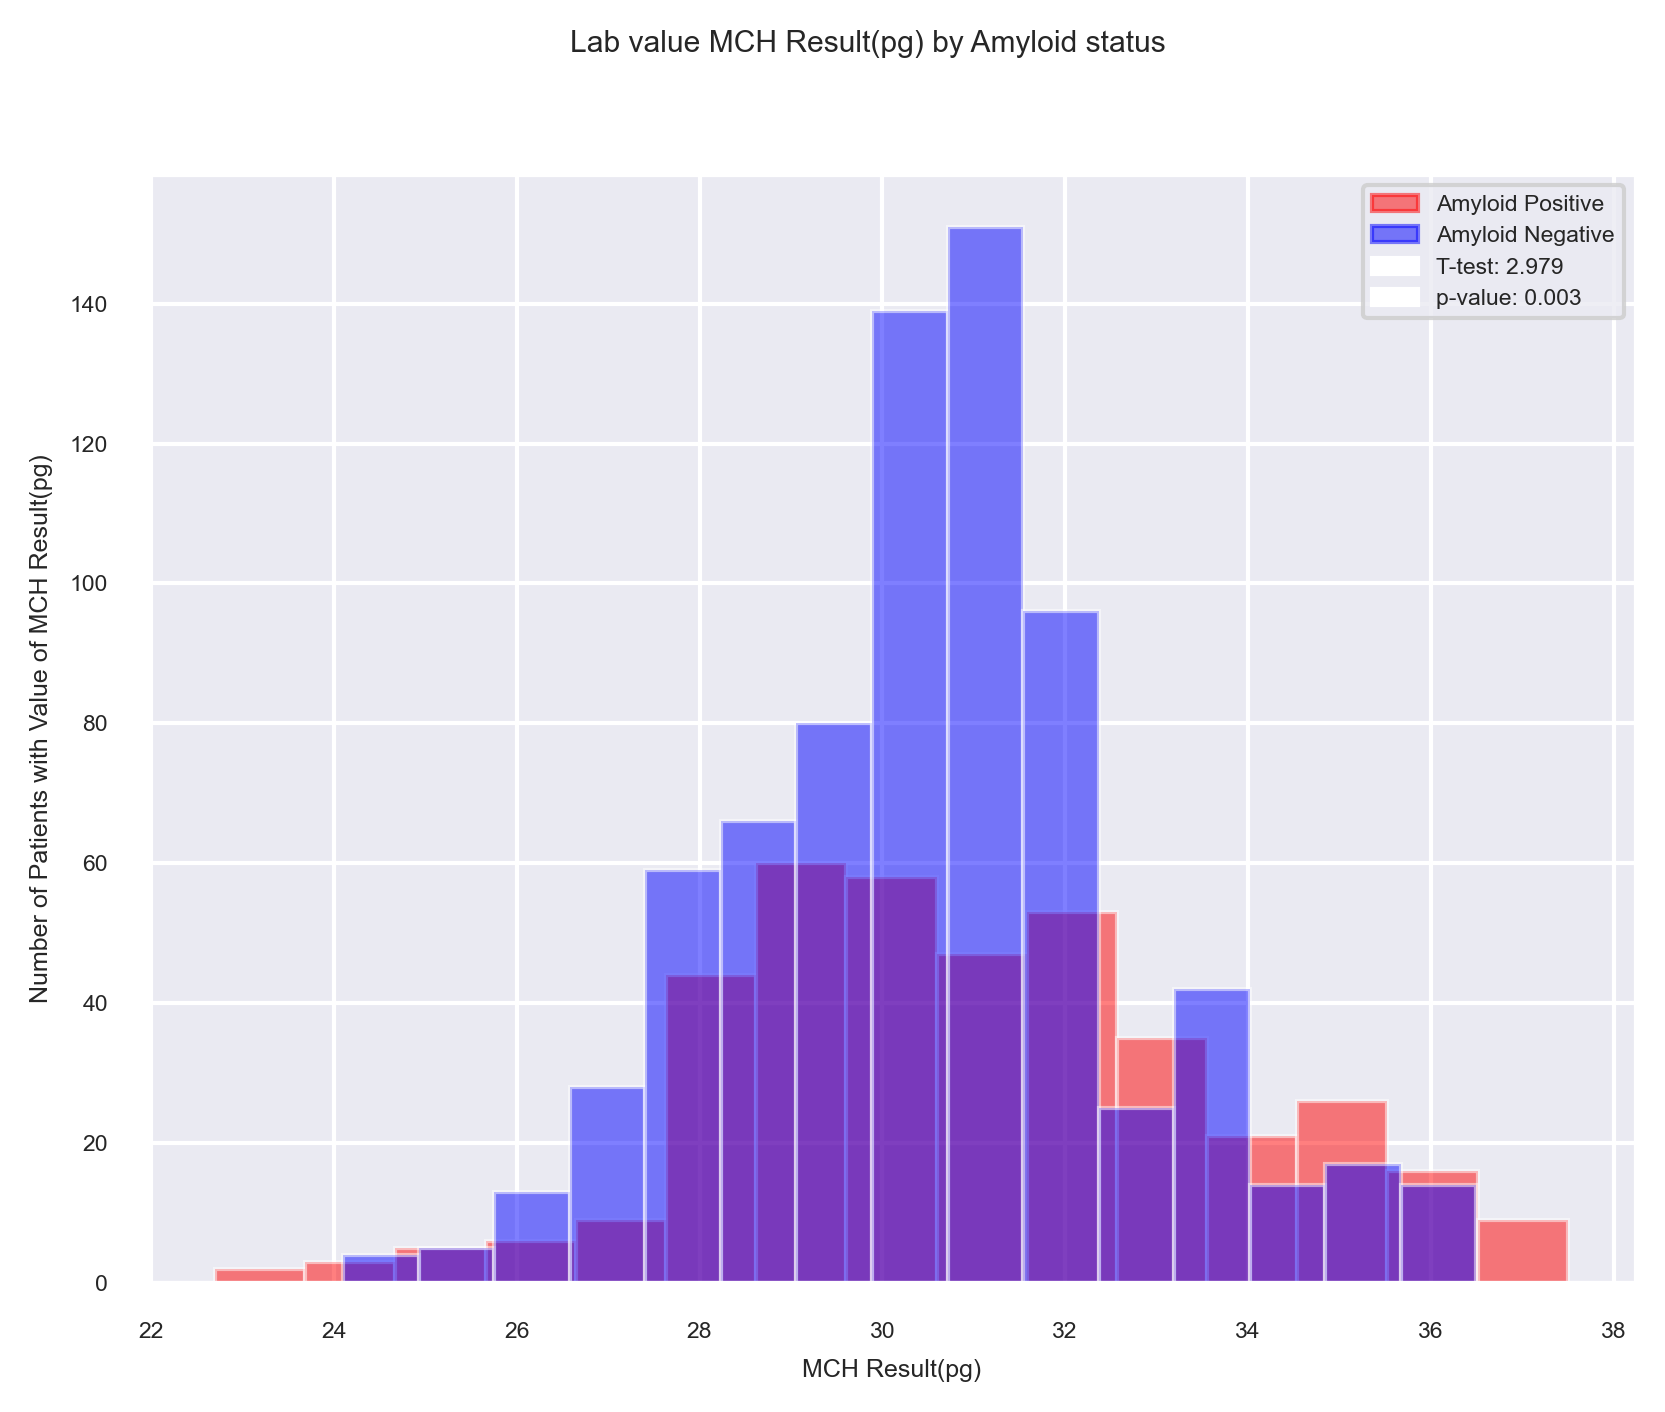

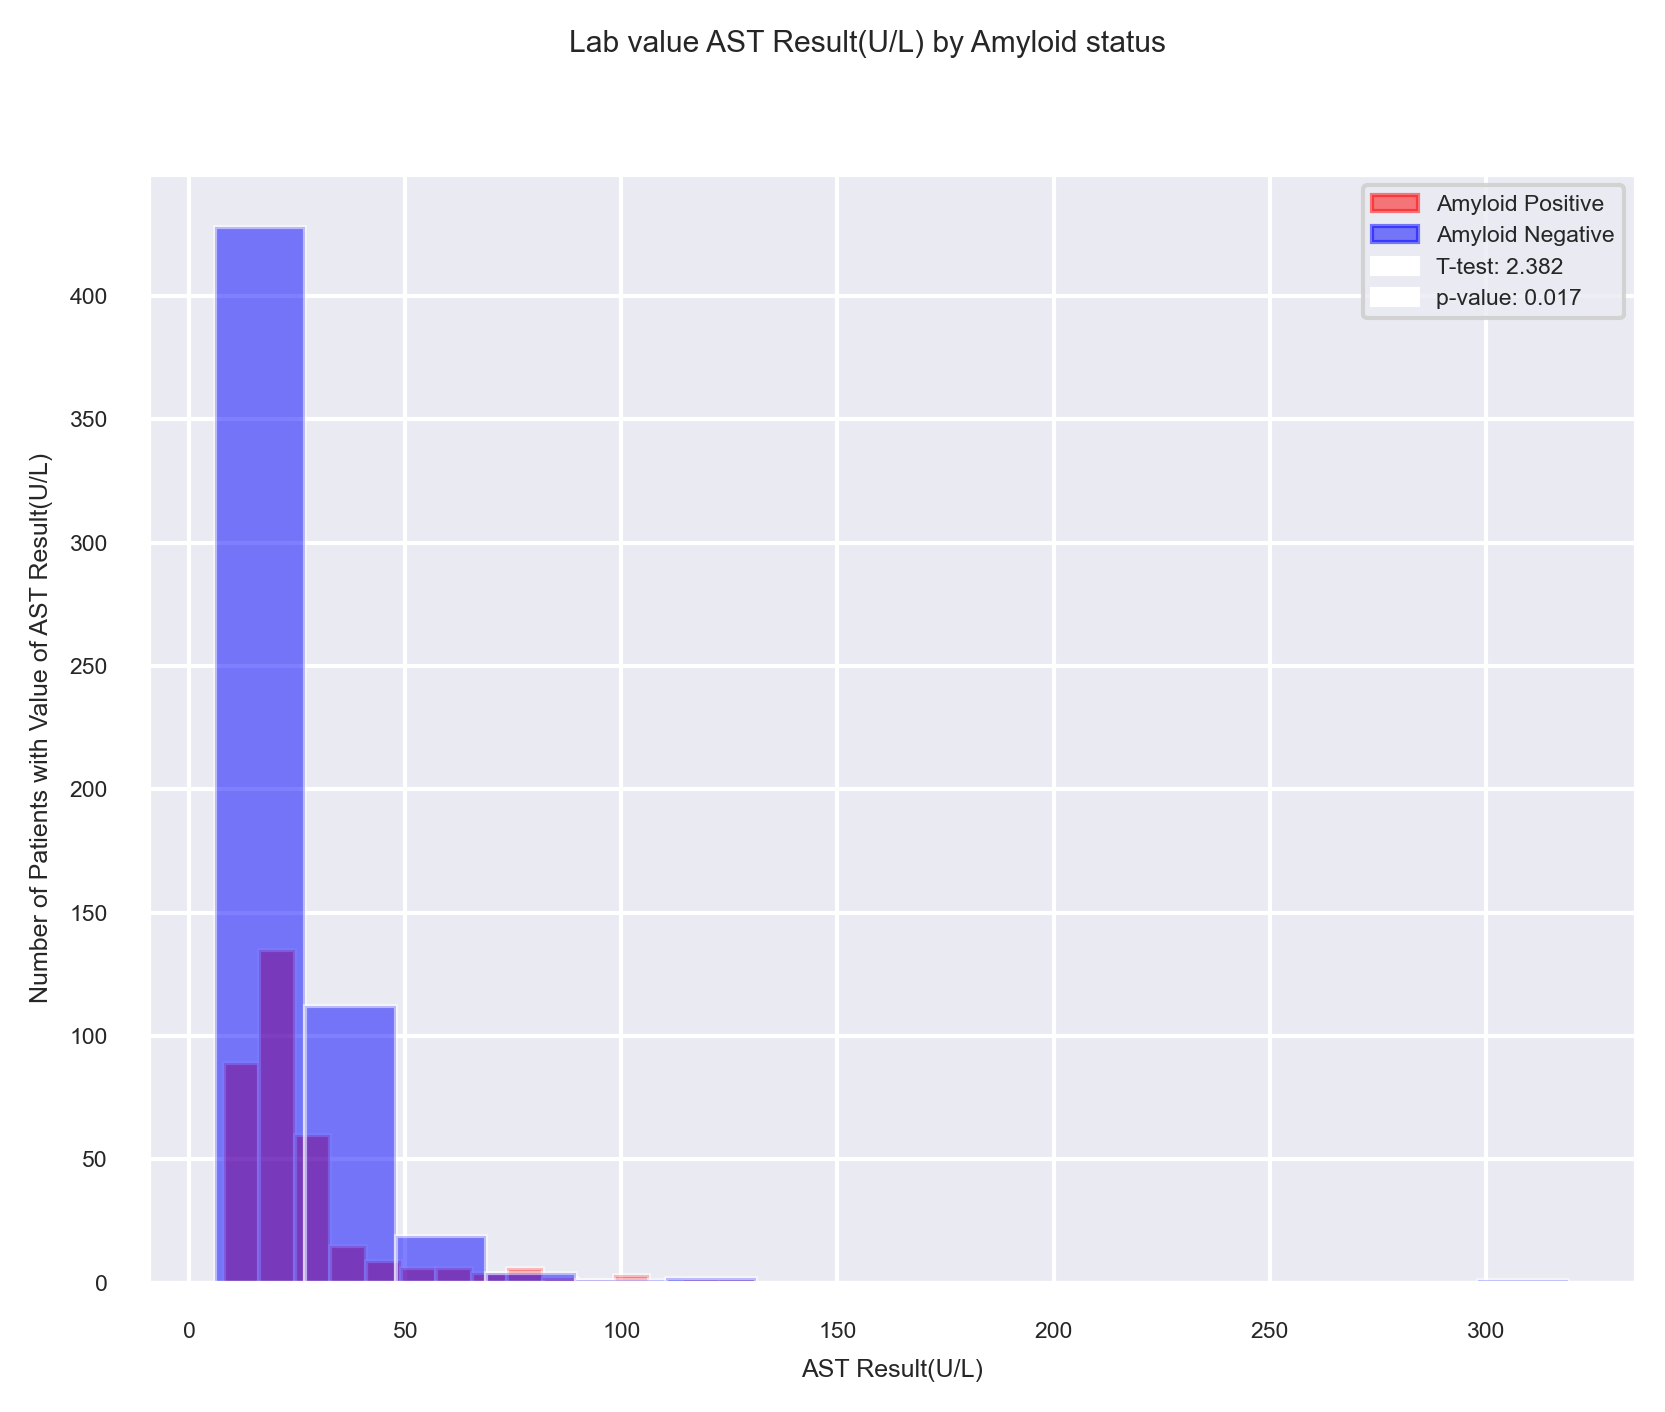

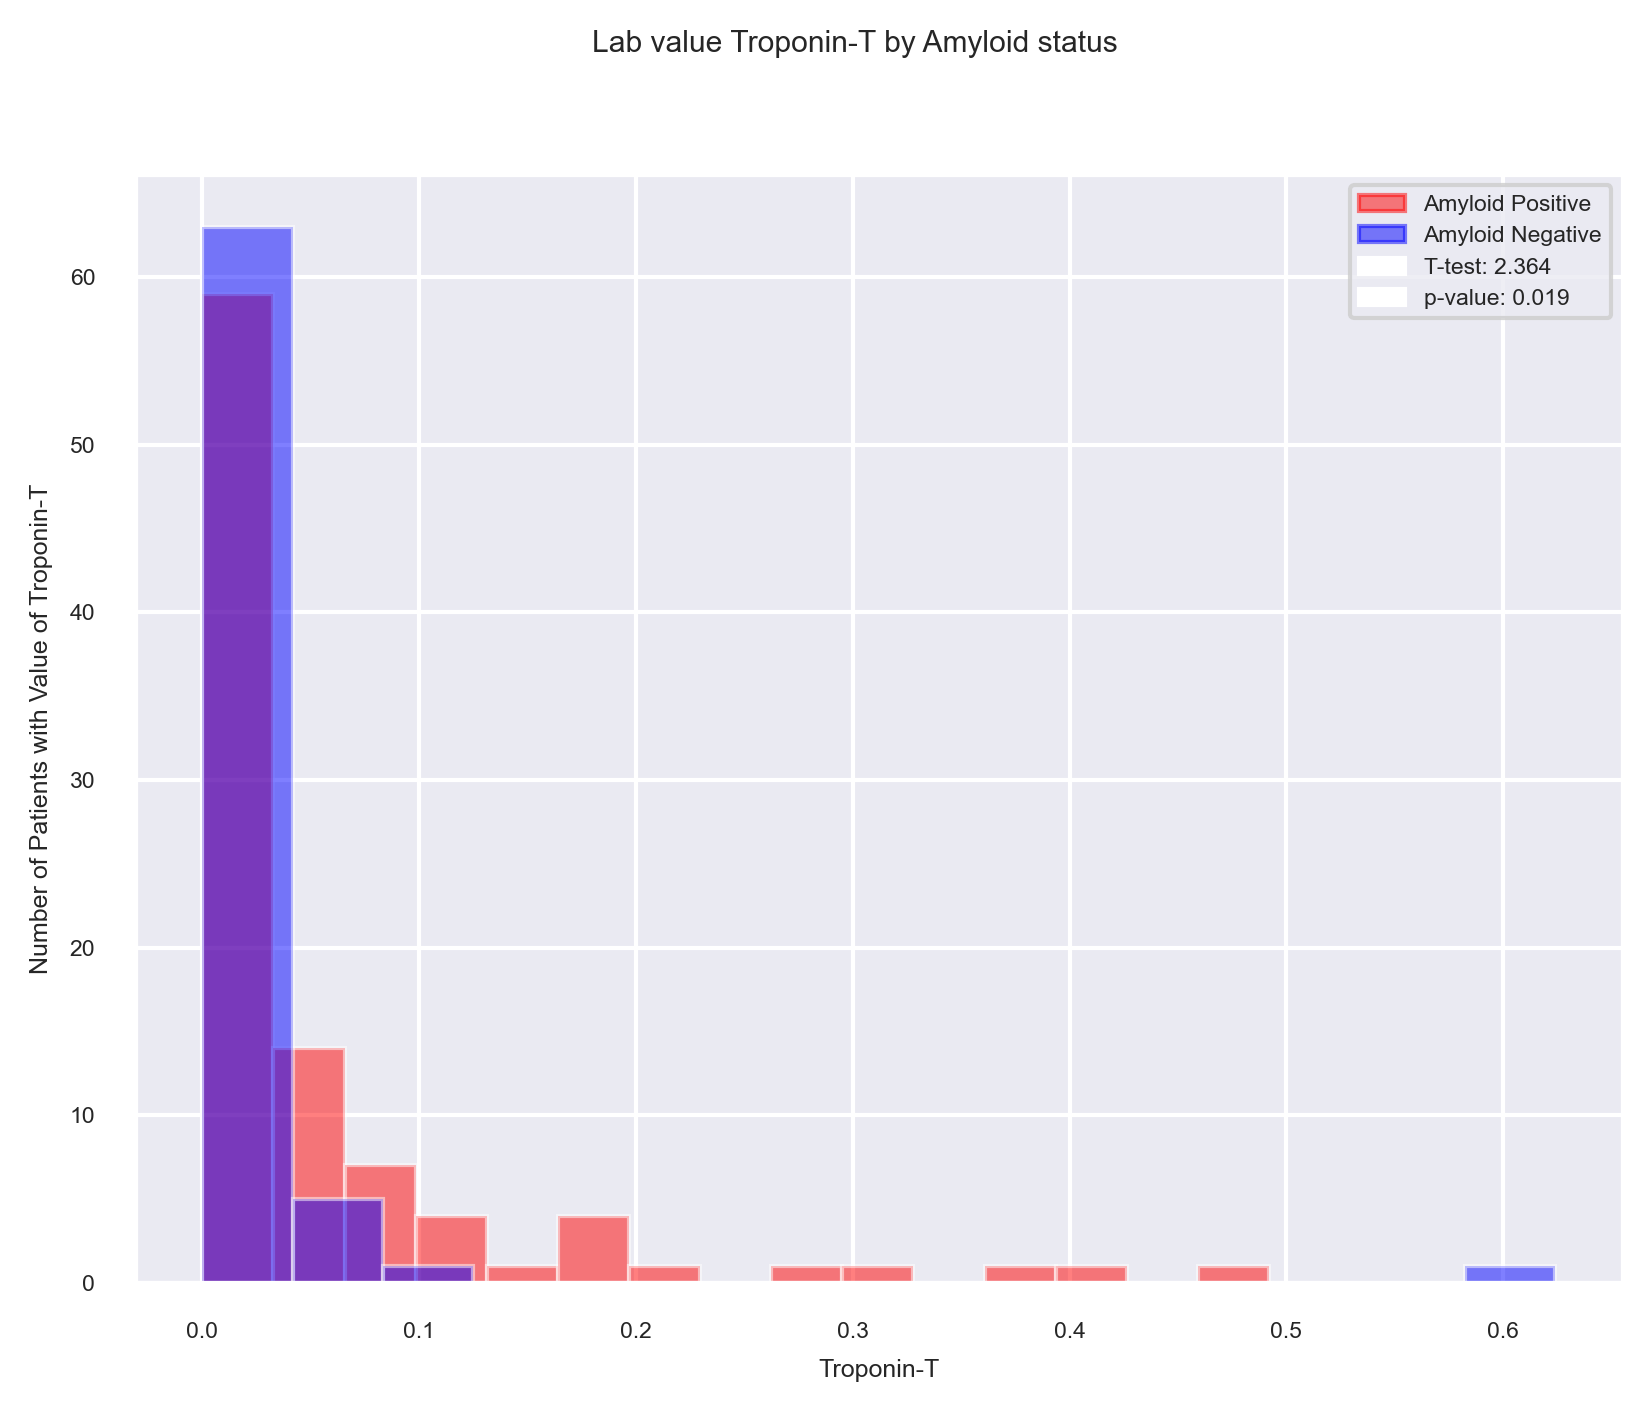

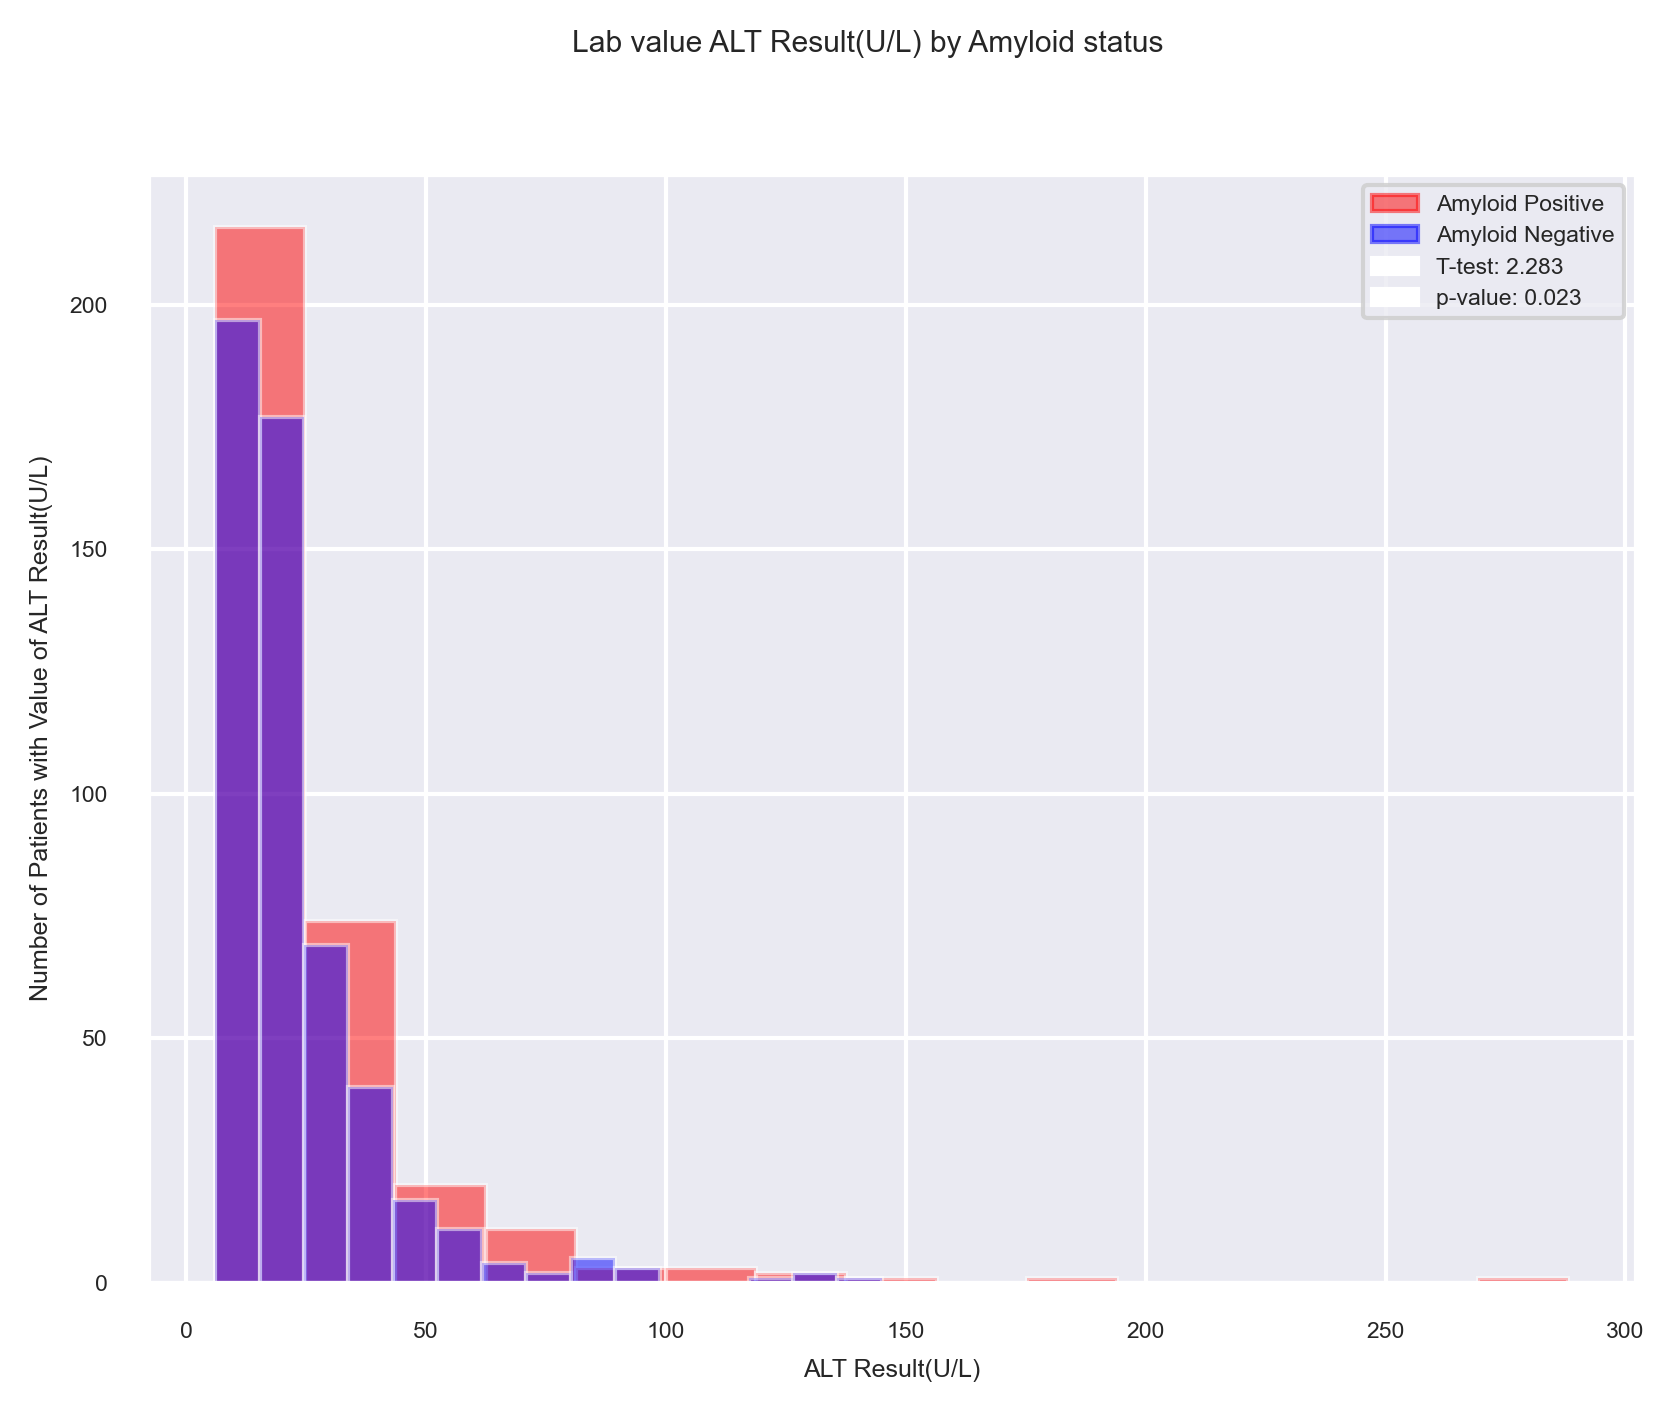

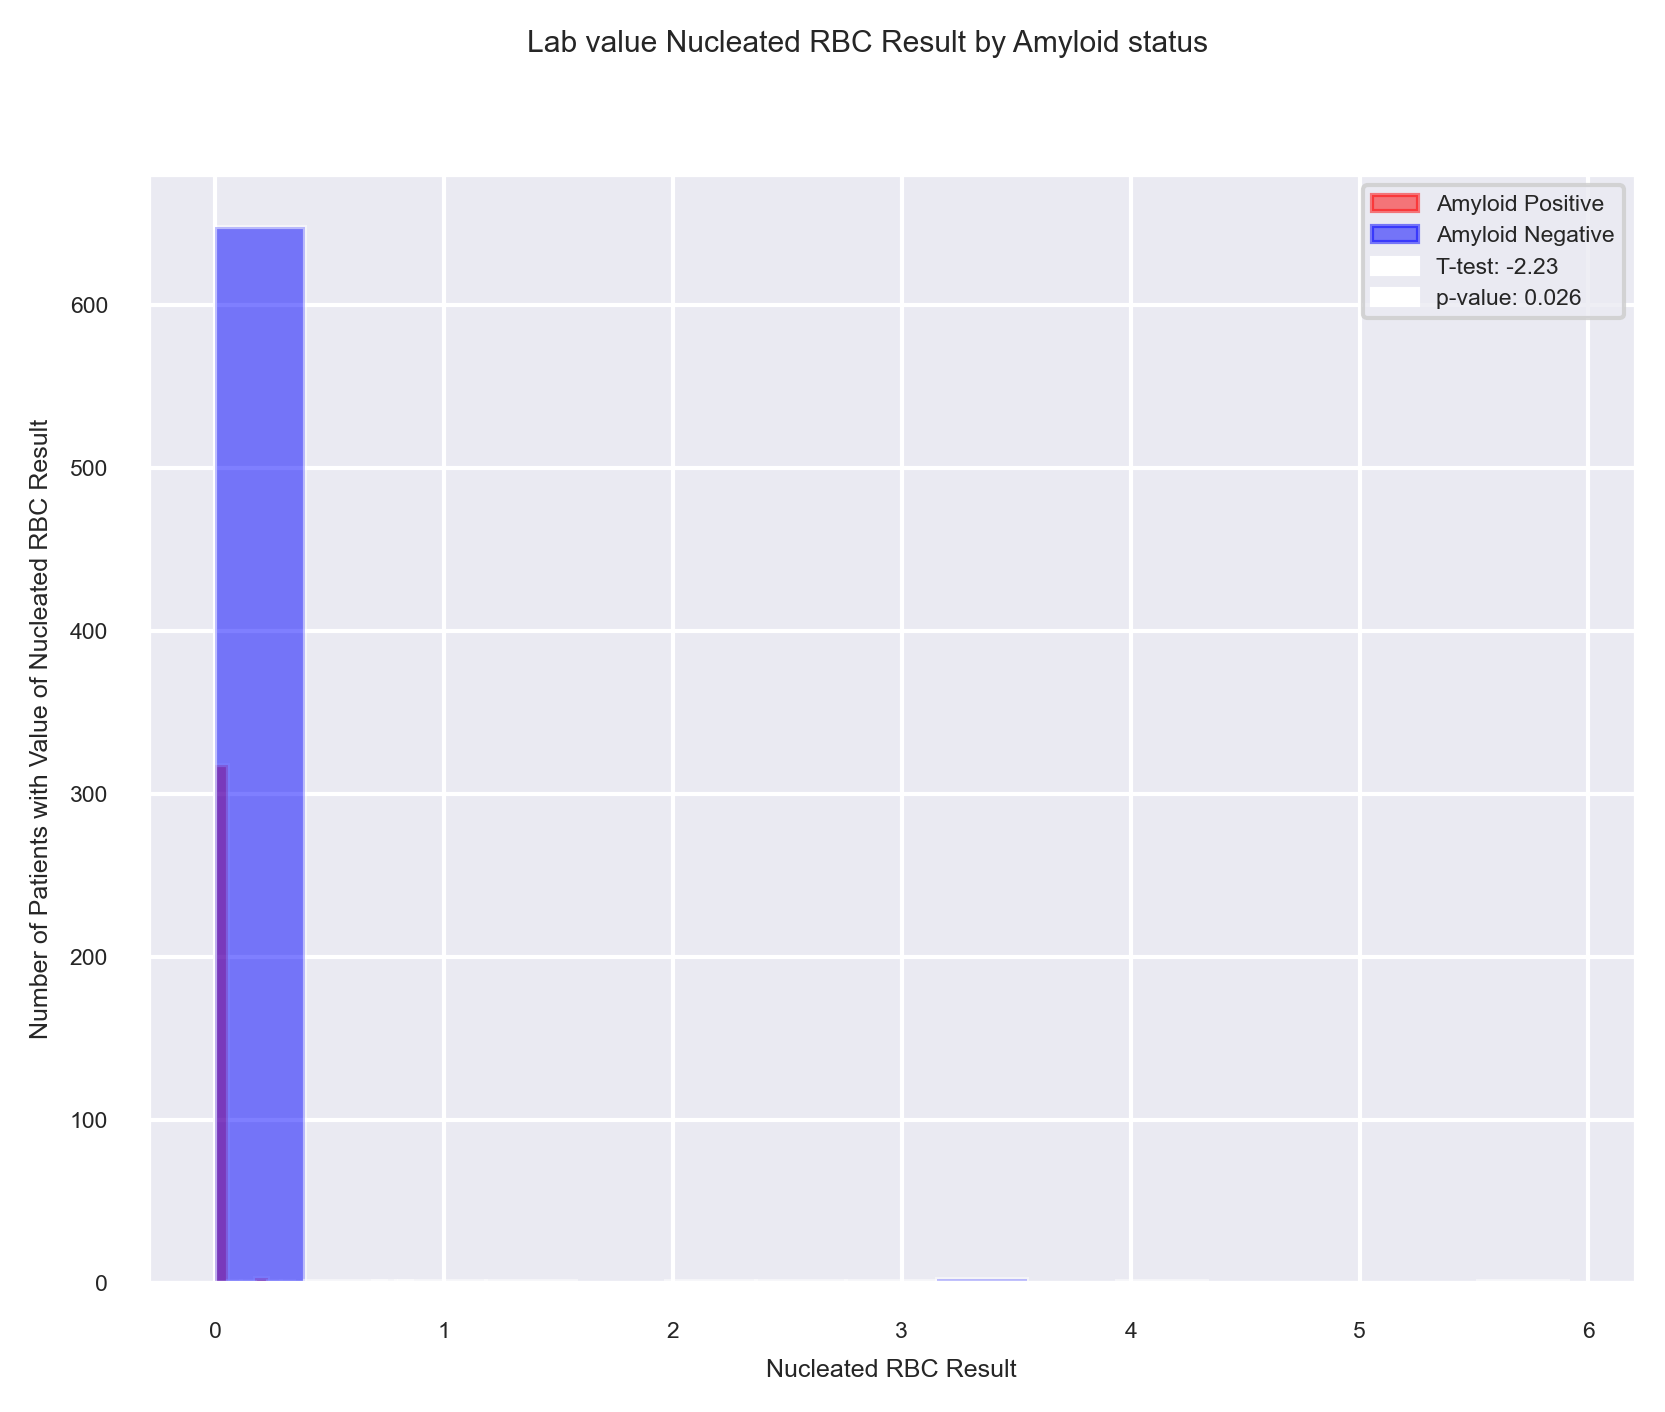

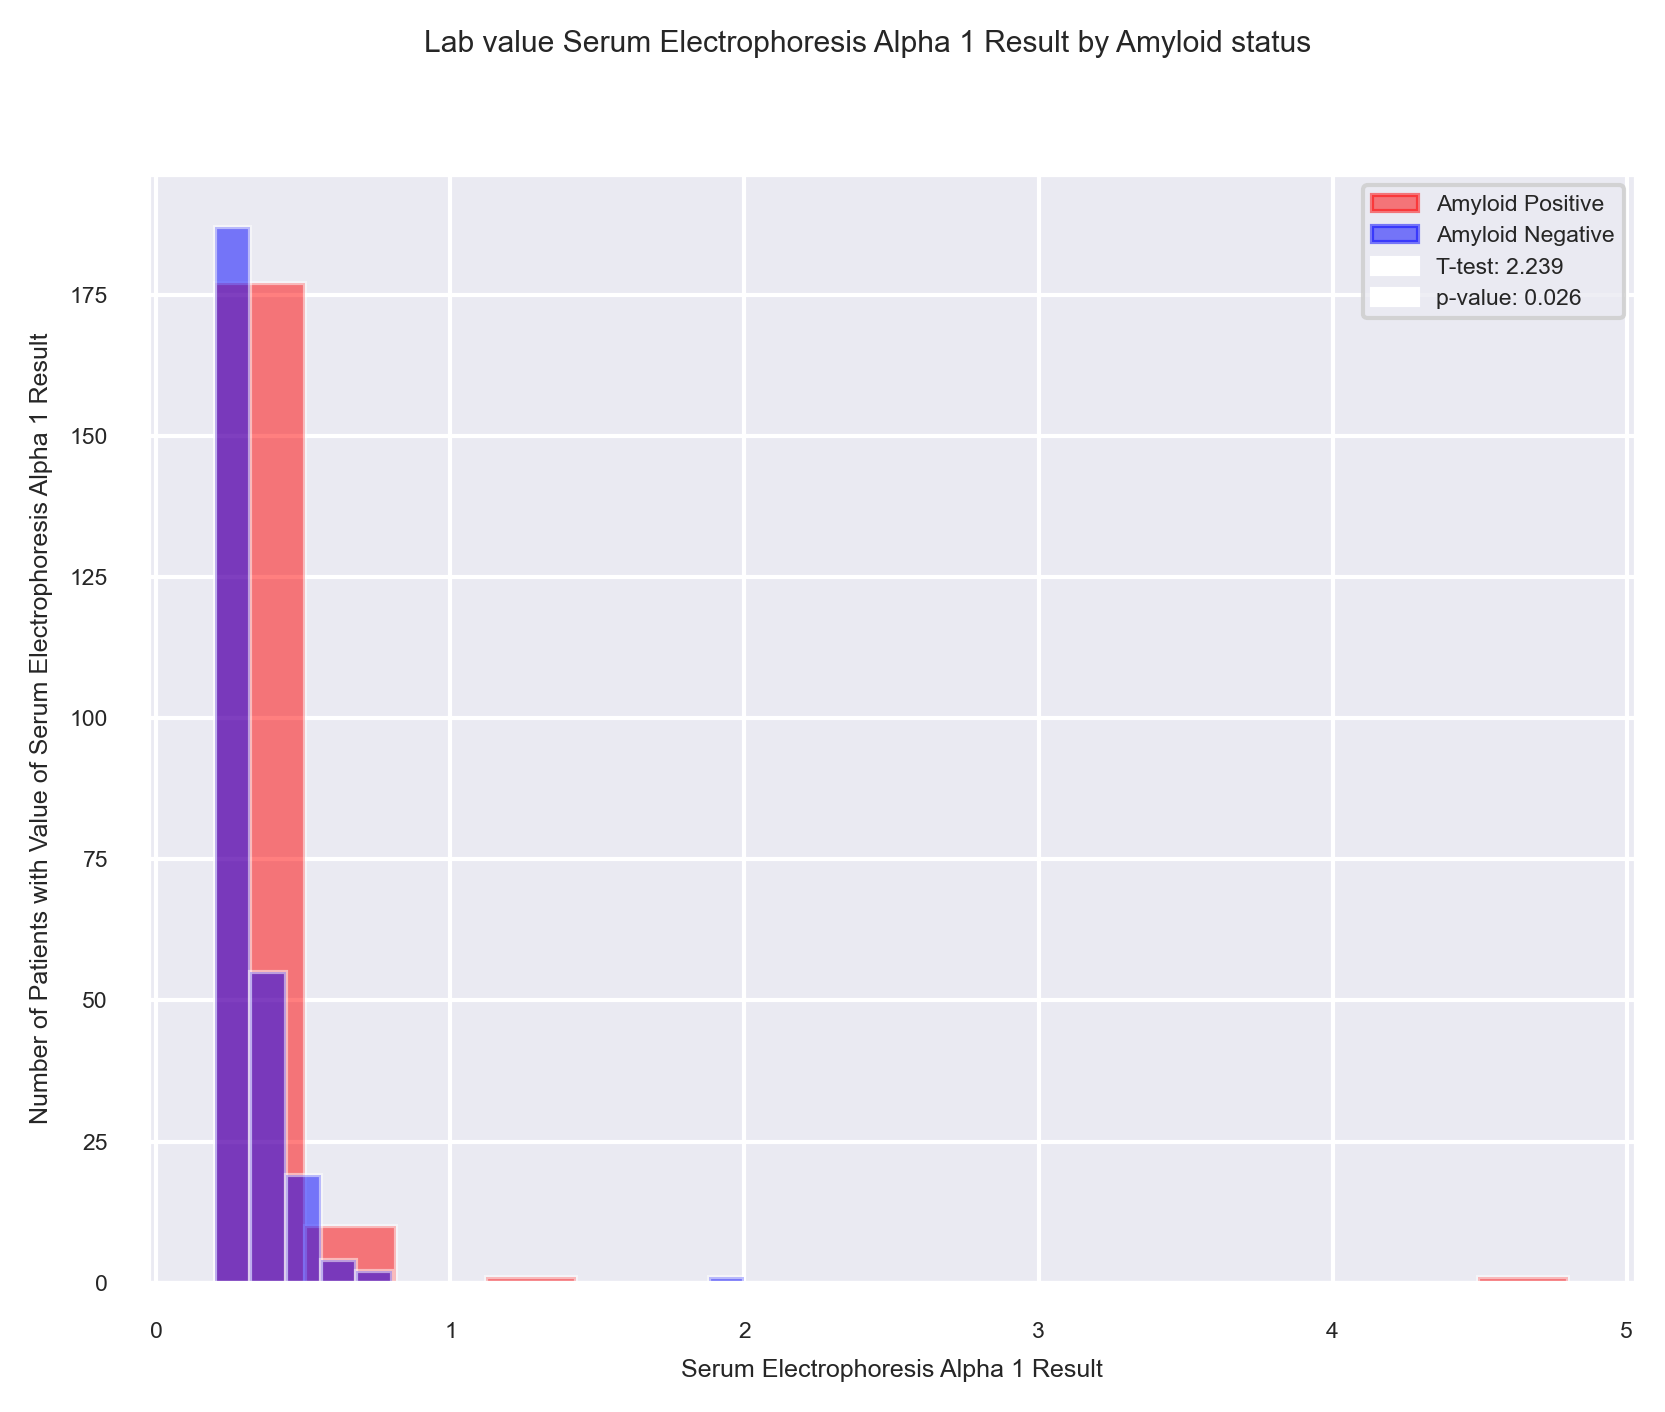

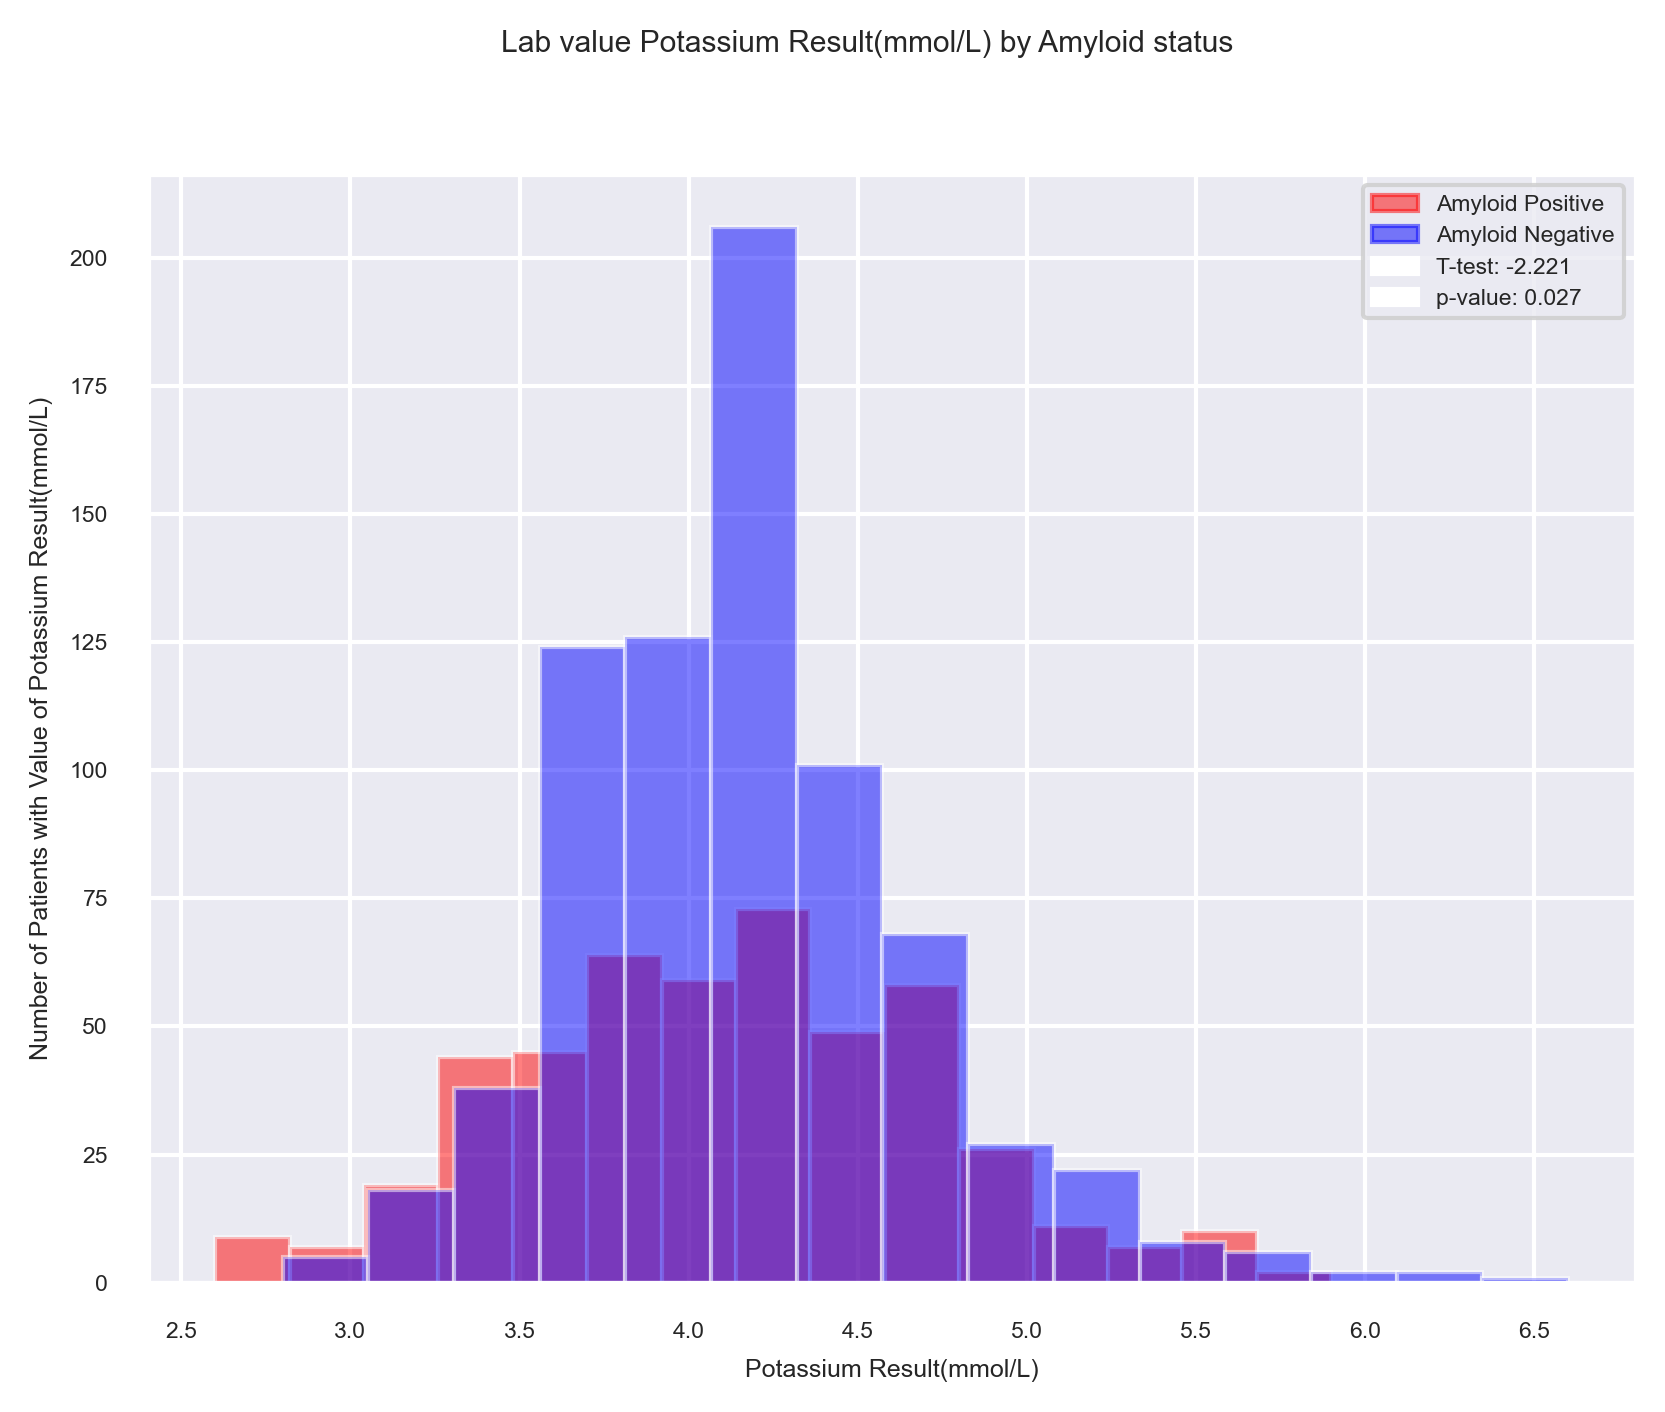

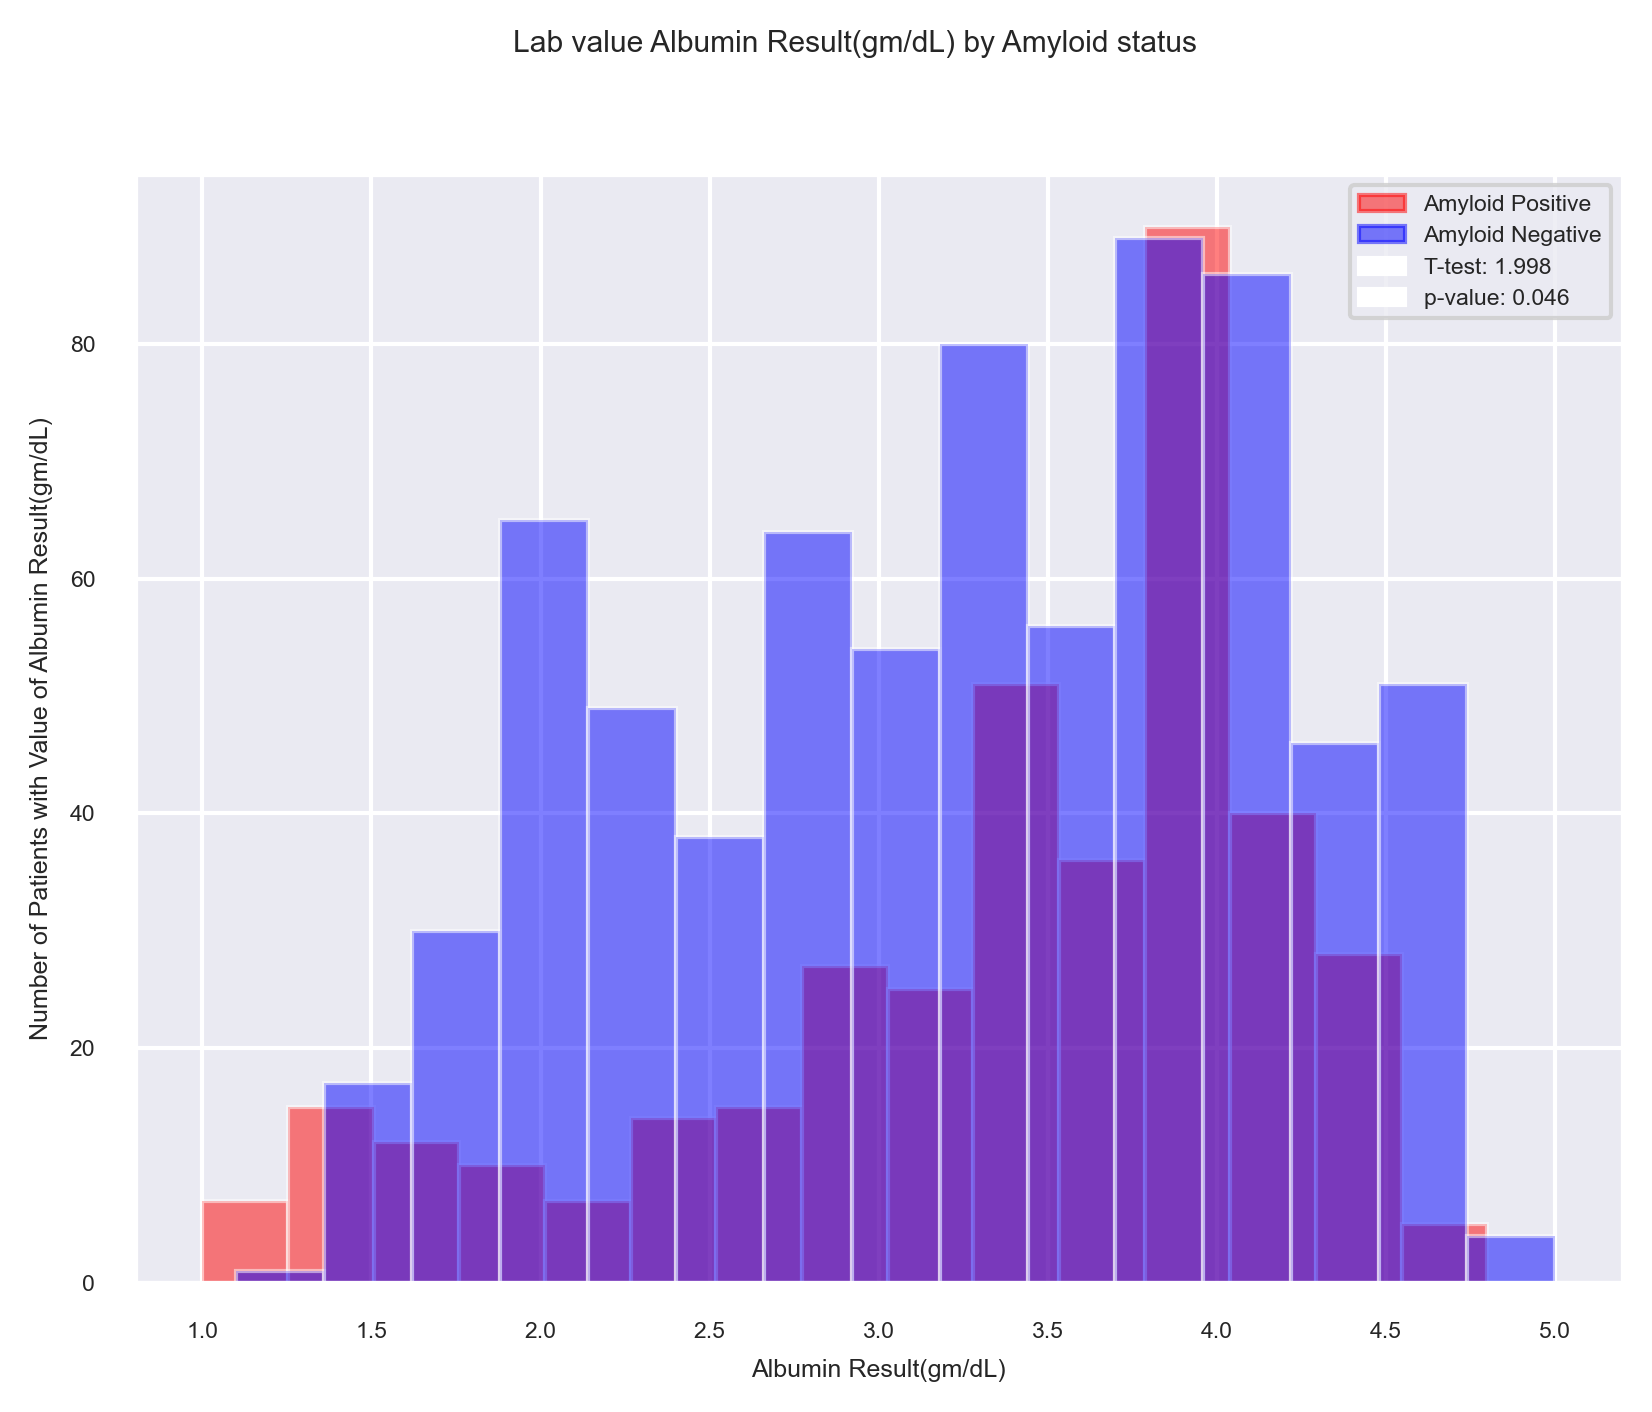

In [37]:
i = 0
df_ALPositive_Echo = labsPositive
df_ALNegative_Echo = labsNegative

for item in columns_to_plot:
    #addition of a way to remove the missing or penalty values... penalty = -1

    dataPostive = labsPositive[item].dropna(axis = 'index')
    dataNegative = labsNegative[item].dropna(axis = 'index')

    fig, ax = plt.subplots()
    ax.hist(dataPostive, bins = 15, color = "red", alpha =0.5)
    ax.hist(dataNegative, bins = 15, color = "blue", alpha = 0.5)
    ax.set_xlabel(item)
    ax.set_ylabel("Number of Patients with Value of " + item)
    amyloidpositive_patch = mpatches.Patch(color = 'red', alpha = 0.5, label = "Amyloid Positive")
    amyloidnegative_patch = mpatches.Patch(color = "blue", alpha = 0.5, label = "Amyloid Negative")
    stats_T_patch = mpatches.Patch(color = "white", label = "T-test: " + str(round(df_imagingValue_stats_2.at[item, 'statistic'], 3)))
    stats_pvalue_patch = mpatches.Patch(color = "white", label = "p-value: " + str(round(df_imagingValue_stats_2.at[item, 'pvalue'], 3)))
    ax.legend(handles = [amyloidpositive_patch, amyloidnegative_patch, stats_T_patch, stats_pvalue_patch])
    fig.suptitle("Lab value " + item + " by Amyloid status")

    fig_file_out = ptFn.outputFiguresPath(fileName_header=fileNameHeader, fileName_mid= "p005_" + str(i) + "_fig_" , 
                                 fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
    
    fig.savefig(fig_file_out, bbox_inches = "tight")

    fig_file_out_jpg = ptFn.outputFiguresPath(fileName_header=fileNameHeader, fileName_mid= "p005_" + str(i) + "_fig_" , 
                                 fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out, fileExtension= '.jpg')
    
    fig.savefig(fig_file_out_jpg, bbox_inches = "tight")
    
    i = i+1